In [96]:
import numpy as np
import scipy
import robustlib as rl
import importlib as il
from scipy import special
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

2.8284271247461903


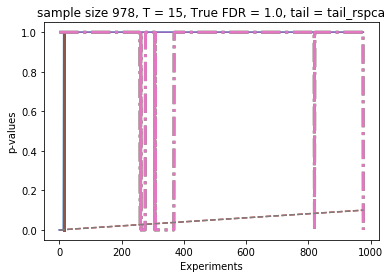

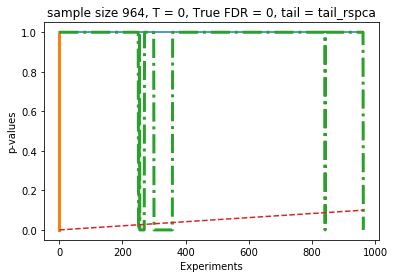

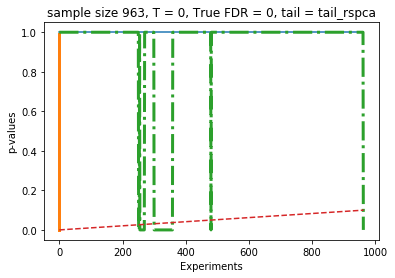

<Figure size 432x288 with 0 Axes>

In [123]:
""" Testing sparse PCA stuff """
il.reload(rl)

d, k, eps, m, mass = 10, 3, 0.1, 1000, 10

tv = np.append(np.ones(k), np.zeros(d-k))
fv = np.append(np.zeros(d-k), np.ones(k))

params = rl.Params(d = d, k = k, eps = eps, m = m, mass = mass)


model = rl.RSPCA_MixtureModel()

inp, S, indicator = model.generate(params, tv, fv)

A = rl.RSPCAb(inp)
A.biter = 2
A.do_plot_rspca = True
ans = A.alg(S, indicator)
print(LA.norm(np.outer(tv, tv) - np.outer(ans,ans)))

Running on d=1000, k=100, eps=0.1, m=10000
Linear filter...
Filtered out 78/9991, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/9913, 0.0 false (nan vs 0.1)
Could not filter
0.424530648918685


/Users/sushrutk/GitHub/robust_sparse_mean_estimation/robustlib.py:223: RuntimeWarning: invalid value encountered in double_scalars
  bad_filtered = np.sum(indicator) - np.sum(indicator[idx])


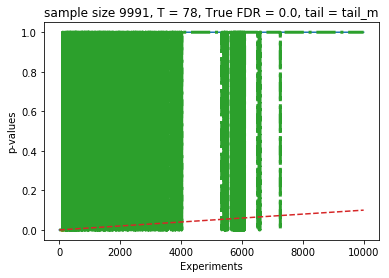

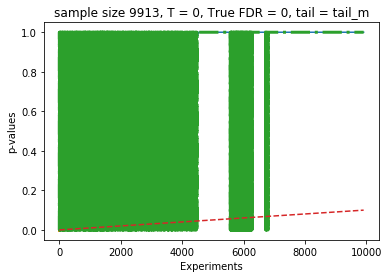

In [58]:
""" Testing sparse mean stuff """

il.reload(rl)

d, k, eps = 1000, 100, 0.1
m = 10000
params = rl.Params(d=d, k=k, eps=eps, m = m)


# model = rl.DenseNoiseModel(-2)
model = rl.BimodalModel()

print(f"Running on d={d}, k={k}, eps={eps}, m={m}")
inp, S, indicator, tm = model.generate(params)

A = rl.RME_sp_L(inp)
A.do_plot_linear = True
ans = A.alg(S, indicator)
print(LA.norm(tm - ans))

# err = rl.get_error(f, inp, tm=tm)
# print(f'Error for {f.__name__}: {err}')


# for f in [rl.RME_sp]:
#     err = rl.get_error(f, *inp)
#     print(f'Error for {f.__name__}: {err}')


In [70]:
"sample complexity vs loss"

il.reload(rl)

trials = 10
d, k, eps = 100, 40, 0.1
m_bounds = (100, 1000, 100)
# model = rl.DenseNoiseModel(-100)

model = rl.BimodalModel()
# model = rl.DenseNoiseModel(-2)
keys = [rl.RME_sp, rl.RME_sp_L, rl.RME, rl.Oracle] #, rl.NP_sp, rl.RME_sp_L, rl.ransacGaussianMean]
model_params = rl.Params(d=d, k=k, eps=eps)
ylims = (0, 1)

def err(a,b): return LA.norm(a-b)

plot_m_loss = rl.plot(model, model_params, err, keys)
plot_m_loss.setdata('m', m_bounds, trials, ylims)




# Runs_l_samples = rl.RunCollection(rl.sparse_samp_loss, model, model_params, m_bounds, keys)
# Runs_l_samples.run(s)

Linear filter...
Filtered out 2/99, 2.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 3/97, 3.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/94, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/94, 0.0 false (nan vs 0.1)
condition 94 94
Could not filter
Linear filter...
Filtered out 2/99, 2.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 3/97, 3.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/94, 0.0 false (nan vs 0.1)
Could not filter
Linear filter...
Filtered out 18/99, 10.0 false (0.56 vs 0.1)
Linear filter...
Filtered out 29/81, 28.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 20/52, 20.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 14/32, 14.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/18, 0.0 false (nan vs 0.1)
Could not filter
Linear filter...
Filtered out 3/199, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/196, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/196, 0.0 false (nan vs 0.1)
condition 196 196
Coul

Filtered out 20/700, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/680, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/680, 0.0 false (nan vs 0.1)
condition 680 680
Could not filter
Linear filter...
Filtered out 20/700, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/680, 0.0 false (nan vs 0.1)
Could not filter
Linear filter...
Filtered out 43/700, 5.0 false (0.12 vs 0.1)
Linear filter...
Filtered out 30/657, 22.0 false (0.73 vs 0.1)
Linear filter...
Filtered out 31/627, 28.0 false (0.90 vs 0.1)
Linear filter...
Filtered out 20/596, 17.0 false (0.85 vs 0.1)
Linear filter...
Filtered out 20/576, 17.0 false (0.85 vs 0.1)
Linear filter...
Filtered out 22/556, 20.0 false (0.91 vs 0.1)
Linear filter...
Filtered out 33/534, 32.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 19/501, 17.0 false (0.89 vs 0.1)
Linear filter...
Filtered out 23/482, 23.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 14/459, 11.0 false (0.79 vs 0.1)
Linear filter...
Filtered out

Filtered out 0/596, 0.0 false (nan vs 0.1)
Could not filter
Linear filter...
Filtered out 33/598, 2.0 false (0.06 vs 0.1)
Linear filter...
Filtered out 22/565, 16.0 false (0.73 vs 0.1)
Linear filter...
Filtered out 13/543, 11.0 false (0.85 vs 0.1)
Linear filter...
Filtered out 14/530, 14.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 27/516, 24.0 false (0.89 vs 0.1)
Linear filter...
Filtered out 23/489, 22.0 false (0.96 vs 0.1)
Linear filter...
Filtered out 15/466, 11.0 false (0.73 vs 0.1)
Linear filter...
Filtered out 13/451, 13.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 10/438, 9.0 false (0.90 vs 0.1)
Linear filter...
Filtered out 11/428, 10.0 false (0.91 vs 0.1)
Linear filter...
Filtered out 10/417, 8.0 false (0.80 vs 0.1)
Linear filter...
Filtered out 14/407, 13.0 false (0.93 vs 0.1)
Linear filter...
Filtered out 7/393, 7.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 4/386, 3.0 false (0.75 vs 0.1)
Linear filter...
Filtered out 2/382, 2.0 false (1.00 vs 0.1)
Line

Filtered out 40/367, 32.0 false (0.80 vs 0.1)
Linear filter...
Filtered out 38/327, 34.0 false (0.89 vs 0.1)
Linear filter...
Filtered out 27/289, 26.0 false (0.96 vs 0.1)
Linear filter...
Filtered out 20/262, 16.0 false (0.80 vs 0.1)
Linear filter...
Filtered out 15/242, 13.0 false (0.87 vs 0.1)
Linear filter...
Filtered out 26/227, 26.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 17/201, 17.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 17/184, 17.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 24/167, 24.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 10/143, 10.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 20/133, 20.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 18/113, 18.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 19/95, 19.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 24/76, 24.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 18/52, 18.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 9/34, 9.0 false (1.00 vs 0.1)
Linear filter..

Linear filter...
Filtered out 16/800, 1.0 false (0.06 vs 0.1)
Linear filter...
Filtered out 0/784, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/784, 0.0 false (nan vs 0.1)
condition 784 784
Could not filter
Linear filter...
Filtered out 16/800, 1.0 false (0.06 vs 0.1)
Linear filter...
Filtered out 0/784, 0.0 false (nan vs 0.1)
Could not filter
Linear filter...
Filtered out 51/800, 10.0 false (0.20 vs 0.1)
Linear filter...
Filtered out 21/749, 16.0 false (0.76 vs 0.1)
Linear filter...
Filtered out 31/728, 28.0 false (0.90 vs 0.1)
Linear filter...
Filtered out 3/697, 3.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 5/694, 3.0 false (0.60 vs 0.1)
Linear filter...
Filtered out 20/689, 17.0 false (0.85 vs 0.1)
Linear filter...
Filtered out 22/669, 19.0 false (0.86 vs 0.1)
Linear filter...
Filtered out 9/647, 8.0 false (0.89 vs 0.1)
Linear filter...
Filtered out 20/638, 18.0 false (0.90 vs 0.1)
Linear filter...
Filtered out 27/618, 23.0 false (0.85 vs 0.1)
Linear filter...


Linear filter...
Filtered out 18/433, 17.0 false (0.94 vs 0.1)
Linear filter...
Filtered out 23/415, 18.0 false (0.78 vs 0.1)
Linear filter...
Filtered out 16/392, 14.0 false (0.88 vs 0.1)
Linear filter...
Filtered out 36/376, 33.0 false (0.92 vs 0.1)
Linear filter...
Filtered out 22/340, 22.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 17/318, 15.0 false (0.88 vs 0.1)
Linear filter...
Filtered out 23/301, 22.0 false (0.96 vs 0.1)
Linear filter...
Filtered out 14/278, 13.0 false (0.93 vs 0.1)
Linear filter...
Filtered out 13/264, 12.0 false (0.92 vs 0.1)
Linear filter...
Filtered out 20/251, 20.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 15/231, 15.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 16/216, 15.0 false (0.94 vs 0.1)
Linear filter...
Filtered out 17/200, 16.0 false (0.94 vs 0.1)
Linear filter...
Filtered out 14/183, 14.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 16/169, 16.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 13/153, 13.0 false (1.00 

Linear filter...
Filtered out 0/193, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/193, 0.0 false (nan vs 0.1)
condition 193 193
Could not filter
Linear filter...
Filtered out 6/199, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/193, 0.0 false (nan vs 0.1)
Could not filter
Linear filter...
Filtered out 18/199, 8.0 false (0.44 vs 0.1)
Linear filter...
Filtered out 21/181, 18.0 false (0.86 vs 0.1)
Linear filter...
Filtered out 33/160, 30.0 false (0.91 vs 0.1)
Linear filter...
Filtered out 24/127, 23.0 false (0.96 vs 0.1)
Linear filter...
Filtered out 22/103, 21.0 false (0.95 vs 0.1)
Linear filter...
Filtered out 19/81, 18.0 false (0.95 vs 0.1)
Linear filter...
Filtered out 12/62, 12.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 16/50, 16.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 12/34, 12.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 11/22, 11.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/11, 0.0 false (nan vs 0.1)
Could not filter
Line

Filtered out 13/568, 10.0 false (0.77 vs 0.1)
Linear filter...
Filtered out 14/555, 10.0 false (0.71 vs 0.1)
Linear filter...
Filtered out 15/541, 14.0 false (0.93 vs 0.1)
Linear filter...
Filtered out 14/526, 13.0 false (0.93 vs 0.1)
Linear filter...
Filtered out 5/512, 4.0 false (0.80 vs 0.1)
Linear filter...
Filtered out 14/507, 14.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 12/493, 11.0 false (0.92 vs 0.1)
Linear filter...
Filtered out 14/481, 14.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 19/467, 18.0 false (0.95 vs 0.1)
Linear filter...
Filtered out 13/448, 12.0 false (0.92 vs 0.1)
Linear filter...
Filtered out 11/435, 10.0 false (0.91 vs 0.1)
Linear filter...
Filtered out 10/424, 8.0 false (0.80 vs 0.1)
Linear filter...
Filtered out 12/414, 12.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/402, 0.0 false (nan vs 0.1)
Could not filter
Linear filter...
Filtered out 34/799, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/765, 0.0 false (nan vs 0.1)
Qu

Linear filter...
Filtered out 20/95, 20.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 17/75, 17.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 21/58, 21.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 11/37, 11.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 13/26, 13.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 7/13, 7.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 3/6, 3.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/3, 0.0 false (nan vs 0.1)
Could not filter
Linear filter...
Filtered out 17/499, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 3/482, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 0/479, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/479, 0.0 false (nan vs 0.1)
condition 479 479
Could not filter
Linear filter...
Filtered out 17/499, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 3/482, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 0/479, 0.0 false (nan vs 0.1)
Could not filter
Linear filter..

Filtered out 15/818, 8.0 false (0.53 vs 0.1)
Linear filter...
Filtered out 5/803, 3.0 false (0.60 vs 0.1)
Linear filter...
Filtered out 5/798, 5.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 8/793, 7.0 false (0.88 vs 0.1)
Linear filter...
Filtered out 9/785, 9.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 11/776, 9.0 false (0.82 vs 0.1)
Linear filter...
Filtered out 11/765, 9.0 false (0.82 vs 0.1)
Linear filter...
Filtered out 3/754, 2.0 false (0.67 vs 0.1)
Linear filter...
Filtered out 0/751, 0.0 false (nan vs 0.1)
Could not filter
Linear filter...
Filtered out 0/97, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/97, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/97, 0.0 false (nan vs 0.1)
condition 97 97
Could not filter
Linear filter...
Filtered out 0/97, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/97, 0.0 false (nan vs 0.1)
Could not filter
Linear filter...
Filtered out 20/97, 14.0 false (0.70 vs 0.1)
Linear filter...
Filtered out 21/77, 21

Filtered out 18/190, 18.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 18/172, 18.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 18/154, 18.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 17/136, 17.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 21/119, 21.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 15/98, 15.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 17/83, 17.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 12/66, 12.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 18/54, 18.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 12/36, 12.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 14/24, 14.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 6/10, 6.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 2/4, 2.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Could not filter
Linear filter...
Filtered out 22/700, 1.0 false (0.05 vs 0.1)
Linear filter...
Filtered out 0/678, 0.0 false (nan vs 0.1)
Quadratic filt

Linear filter...
Filtered out 15/123, 15.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 16/108, 16.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 22/92, 22.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 17/70, 17.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 17/53, 17.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 13/36, 13.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 8/23, 8.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 7/15, 7.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 4/8, 4.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/4, 0.0 false (nan vs 0.1)
Could not filter
Linear filter...
Filtered out 9/399, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/390, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/388, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/388, 0.0 false (nan vs 0.1)
condition 388 388
Could not filter
Linear filter...
Filtered out 9/399, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2

Linear filter...
Filtered out 12/27, 12.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 8/15, 8.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 4/7, 4.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/3, 0.0 false (nan vs 0.1)
Could not filter
Linear filter...
Filtered out 16/400, 1.0 false (0.06 vs 0.1)
Linear filter...
Filtered out 3/384, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
condition 381 381
Could not filter
Linear filter...
Filtered out 16/400, 1.0 false (0.06 vs 0.1)
Linear filter...
Filtered out 3/384, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
Could not filter
Linear filter...
Filtered out 21/400, 1.0 false (0.05 vs 0.1)
Linear filter...
Filtered out 29/379, 23.0 false (0.79 vs 0.1)
Linear filter...
Filtered out 26/350, 21.0 false (0.81 vs 0.1)
Linear filter...
Filtered out 24/324, 18.0 false (0.75 vs 0.1)
Linear filte

Linear filter...
Filtered out 15/799, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/784, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/784, 0.0 false (nan vs 0.1)
condition 784 784
Could not filter
Linear filter...
Filtered out 15/799, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/784, 0.0 false (nan vs 0.1)
Could not filter
Linear filter...
Filtered out 48/799, 8.0 false (0.17 vs 0.1)
Linear filter...
Filtered out 24/751, 15.0 false (0.62 vs 0.1)
Linear filter...
Filtered out 21/727, 13.0 false (0.62 vs 0.1)
Linear filter...
Filtered out 15/706, 15.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 16/691, 15.0 false (0.94 vs 0.1)
Linear filter...
Filtered out 20/675, 16.0 false (0.80 vs 0.1)
Linear filter...
Filtered out 15/655, 10.0 false (0.67 vs 0.1)
Linear filter...
Filtered out 6/640, 5.0 false (0.83 vs 0.1)
Linear filter...
Filtered out 18/634, 17.0 false (0.94 vs 0.1)
Linear filter...
Filtered out 9/616, 7.0 false (0.78 vs 0.1)
Linear filter...

Linear filter...
Filtered out 23/307, 23.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 26/284, 26.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 17/258, 17.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 16/241, 14.0 false (0.88 vs 0.1)
Linear filter...
Filtered out 18/225, 17.0 false (0.94 vs 0.1)
Linear filter...
Filtered out 12/207, 12.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 5/195, 5.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 20/190, 20.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 22/170, 22.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 17/148, 17.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 10/131, 10.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 13/121, 13.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 8/108, 8.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 13/100, 13.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 17/87, 17.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 11/70, 11.0 false (1.00 vs 0.1

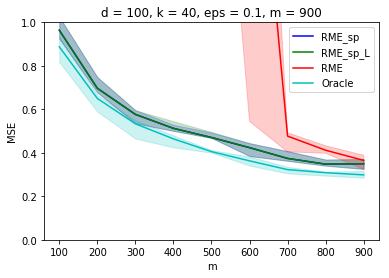

<Figure size 432x288 with 0 Axes>

In [73]:
il.reload(rl)

plot_m_loss.plotxy('m', m_bounds, (0, 1))

In [87]:
"sparsity vs sample complexity for RME_sp"

il.reload(rl)

d, eps = 1000, 0.1
params = rl.Params(d=d, eps=eps)
trials = 5

model = rl.BimodalModel()

print(f"Running on d={d}, eps={eps}, m={m}")
inp, S, indicator, tm = model.generate(params)

keys = [rl.RME_sp]
ylims = (0, 100)
k_bounds = (1, 60, 1)

plot_m_loss = rl.plot(model, params, err, keys)
plot_m_loss.setdata('k', k_bounds, trials, ylims, y_is_m = True, mrange = (2,200))

Running on d=1000, eps=0.1, m=2000
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  3.320193928663116 m  2 xvar  1 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  2.9145374371589656 m  2 xvar  1 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  2.7683339070673707 m  2 xvar  1 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  2.9413074387666547 m  2 xvar  1 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  2.725961641664678 m  2 xva

Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
condition 200 200
Could not filter
VNEW  0.35124244684203937 m  202 xvar  2 count 7
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
condition 201 201
Could not filter
VNEW  0.30601177503939586 m  202 xvar  2 count 8
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
condition 201 201
Could not filter
VNEW  0.3223786010000207 m  202 xvar  2 count 9
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  4.774181861939681 m  2 xvar  3 count 0
Linea

Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
condition 198 198
Could not filter
VNEW  0.5172506534273484 m  202 xvar  4 count 4
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
condition 200 200
Could not filter
VNEW  0.45218584018899916 m  202 xvar  4 count 5
Linear filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
condition 199 199
Could not filter
VNEW  0.47223328159452976 m  202 xvar  4 count 6
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
condition 200 200

Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
condition 200 200
Could not filter
VNEW  0.533773010382704 m  202 xvar  6 count 1
Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
condition 198 198
Could not filter
VNEW  0.46873223848348594 m  202 xvar  6 count 2
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
condition 200 200
Could not filter
VNEW  0.5273318836999128 m  202 xvar  6 count 3
Linear filter...
Filtered out 0/202, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/202, 0.0 false (nan vs 0.1)
condition 202 202
Could not filter
VNEW  0.5320526183776109 m  202 xvar  6 coun

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  6.86322430364965 m  2 xvar  8 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  7.6627964014713825 m  2 xvar  8 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  6.878820879124683 m  2 xvar  8 count 0
Linear filter...
Filtered out 0/202, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/202, 0.0 false (nan vs 0.1)
condition 202 202
Could not filter
VNEW  0.6441251525105888 m  202 xvar  8 count 0
Linear filter...
Filtered out 0/202, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/202, 0.0 false (nan vs 0.1)
condition 202 202
Could not filter
VNEW  0.6302644117281062 m  202 xvar  8 count 1
Lin

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  7.863540158783379 m  2 xvar  10 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  7.986983910889603 m  2 xvar  10 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  8.156561102016957 m  2 xvar  10 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  7.801624457540288 m  2 xvar  10 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  7.652487954889767 m  2 xvar  10 count 0
Linear filter...
Fil

Linear filter...
Filtered out 2/199, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/197, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/197, 0.0 false (nan vs 0.1)
condition 197 197
Could not filter
VNEW  0.7032354311158904 m  202 xvar  11 count 9
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  8.676717899062304 m  2 xvar  12 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  8.2649039589136 m  2 xvar  12 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  8.751726406905792 m  2 xvar  12 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not fil

Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
condition 200 200
Could not filter
VNEW  0.7640839180283641 m  202 xvar  13 count 5
Linear filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
condition 199 199
Could not filter
VNEW  0.7078634973991055 m  202 xvar  13 count 6
Linear filter...
Filtered out 0/202, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/202, 0.0 false (nan vs 0.1)
condition 202 202
Could not filter
VNEW  0.7648581613554569 m  202 xvar  13 count 7
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
condition 200 200
Could not filter
VNEW  0.7485121997106424 m  202 xvar  13 

Linear filter...
Filtered out 3/202, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
condition 199 199
Could not filter
VNEW  0.7904985036983747 m  202 xvar  15 count 1
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
condition 200 200
Could not filter
VNEW  0.7483101196021297 m  202 xvar  15 count 2
Linear filter...
Filtered out 5/199, 1.0 false (0.20 vs 0.1)
Linear filter...
Filtered out 0/194, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/194, 0.0 false (nan vs 0.1)
condition 194 194
Could not filter
VNEW  0.797582226894424 m  202 xvar  15 count 3
Linear filter...
Filtered out 2/201, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
condition 199 

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  9.516536280742367 m  2 xvar  17 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  10.159075938218482 m  2 xvar  17 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  9.87222703624682 m  2 xvar  17 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  10.200570351133878 m  2 xvar  17 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  9.367440510835788 m  2 xvar  17 count 0
Linear filter...
Fi

Linear filter...
Filtered out 4/200, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 3/196, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 0/193, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 3/193, 0.0 false (0.00 vs 0.1)
condition 190 193
Linear filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
condition 190 190
Could not filter
VNEW  0.8050315267942488 m  202 xvar  18 count 8
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 7/201, 0.0 false (0.00 vs 0.1)
condition 194 201
Linear filter...
Filtered out 0/194, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/194, 0.0 false (nan vs 0.1)
condition 194 194
Could not filter
VNEW  0.8624817243464196 m  202 xvar  18 count 9
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
c

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  10.528580082962577 m  2 xvar  20 count 0
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
condition 201 201
Could not filter
VNEW  0.8739122303752234 m  202 xvar  20 count 0
Linear filter...
Filtered out 2/201, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
condition 199 199
Could not filter
VNEW  0.8609797200446152 m  202 xvar  20 count 1
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
condition 201 201
Could not filter
VNEW  0.8298992398733994 m  202 xvar  20 count 2
L

Linear filter...
Filtered out 3/201, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 3/198, 0.0 false (0.00 vs 0.1)
condition 195 198
Linear filter...
Filtered out 0/195, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/195, 0.0 false (nan vs 0.1)
condition 195 195
Could not filter
VNEW  0.8550929118285899 m  202 xvar  21 count 7
Linear filter...
Filtered out 3/201, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 4/198, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/194, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/194, 0.0 false (nan vs 0.1)
condition 194 194
Could not filter
VNEW  0.9163063278038421 m  202 xvar  21 count 8
Linear filter...
Filtered out 3/199, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/196, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 4/196, 0.0 false (0.00 vs 0.1)
condition 192 196
Linear filter...
Filtered out 0/192, 0.0 false (nan vs 0.1

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  11.398668729358798 m  2 xvar  23 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  10.573409079193372 m  2 xvar  23 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  10.521650655815801 m  2 xvar  23 count 0
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 10/201, 0.0 false (0.00 vs 0.1)
condition 191 201
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  0.9061973642894093 m  202 xvar  23 count 0

Linear filter...
Filtered out 2/199, 1.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 2/197, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/195, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 5/195, 0.0 false (0.00 vs 0.1)
condition 190 195
Linear filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
condition 190 190
Could not filter
VNEW  0.9165903112520832 m  202 xvar  24 count 4
Linear filter...
Filtered out 4/202, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 4/198, 0.0 false (0.00 vs 0.1)
condition 194 198
Linear filter...
Filtered out 0/194, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/194, 0.0 false (nan vs 0.1)
condition 194 194
Could not filter
VNEW  0.9866920037363934 m  202 xvar  24 count 5
Linear filter...
Filtered out 3/200, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 0/197, 0.0 false (nan vs 0.1

Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 7/198, 0.0 false (0.00 vs 0.1)
condition 191 198
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  0.9385663035264897 m  202 xvar  25 count 9
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  11.241040493978282 m  2 xvar  26 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  12.303660879872323 m  2 xvar  26 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  11.568398877003979 m  2 xvar  26 count 0


Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  11.385303670191043 m  2 xvar  27 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  10.785280944753975 m  2 xvar  27 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  11.264884178070112 m  2 xvar  27 count 0
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 9/200, 0.0 false (0.00 vs 0.1)
condition 191 200
Linear filter...
Filtered out 3/191, 3.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/188, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/188, 0.0 false (nan vs 0.1)
condition 188 188
Could

Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 9/201, 0.0 false (0.00 vs 0.1)
condition 192 201
Linear filter...
Filtered out 0/192, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/192, 0.0 false (nan vs 0.1)
condition 192 192
Could not filter
VNEW  0.9792547877254524 m  202 xvar  28 count 4
Linear filter...
Filtered out 2/201, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/199, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/197, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 6/197, 0.0 false (0.00 vs 0.1)
condition 191 197
Linear filter...
Filtered out 2/191, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/189, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/189, 0.0 false (nan vs 0.1)
condition 189 189
Could not filter
VNEW  0.9819335870059062 m  202 xvar  28 count 5
Linear filter...
Filtered out 2/200, 0.0 false (0.00 vs 0.1

Linear filter...
Filtered out 2/201, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 3/199, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/196, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 5/196, 0.0 false (0.00 vs 0.1)
condition 191 196
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  0.9879353298543313 m  202 xvar  29 count 9
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  12.239231034878795 m  2 xvar  30 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  11.82411529057818 m  2 xvar  30 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Cou

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  12.589190395658326 m  2 xvar  31 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  11.609413733285255 m  2 xvar  31 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  11.045757448651184 m  2 xvar  31 count 0
Linear filter...
Filtered out 3/198, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/195, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/193, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 2/193, 0.0 false (0.00 vs 0.1)
condition 191 193
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Coul

Linear filter...
Filtered out 2/201, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 8/199, 0.0 false (0.00 vs 0.1)
condition 191 199
Linear filter...
Filtered out 5/191, 5.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/186, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/186, 0.0 false (nan vs 0.1)
condition 186 186
Could not filter
VNEW  1.1056711729091444 m  202 xvar  32 count 4
Linear filter...
Filtered out 2/200, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 7/198, 0.0 false (0.00 vs 0.1)
condition 191 198
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  1.0627524646344164 m  202 xvar  32 count 5
Linear filter...
Filtered out 3/200, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 3/197, 2.0 false (0.67 vs 0.

Linear filter...
Filtered out 2/199, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/197, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 6/197, 0.0 false (0.00 vs 0.1)
condition 191 197
Linear filter...
Filtered out 4/191, 3.0 false (0.75 vs 0.1)
Linear filter...
Filtered out 0/187, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/187, 0.0 false (nan vs 0.1)
condition 187 187
Could not filter
VNEW  1.07762778508506 m  202 xvar  33 count 9
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  12.990252238453056 m  2 xvar  34 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  12.470992673066146 m  2 xvar  34 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Coul

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.210383525644827 m  2 xvar  35 count 0
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 9/200, 0.0 false (0.00 vs 0.1)
condition 191 200
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  1.1398169293878408 m  202 xvar  35 count 0
Linear filter...
Filtered out 2/197, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/195, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 4/195, 0.0 false (0.00 vs 0.1)
condition 191 195
Linear filter...
Filtered out 2/191, 2.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/189, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/189, 0.0 false (nan vs 0.1)
conditi

Linear filter...
Filtered out 3/202, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 2/199, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/197, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 7/197, 0.0 false (0.00 vs 0.1)
condition 190 197
Linear filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
condition 190 190
Could not filter
VNEW  1.0805771133615953 m  202 xvar  36 count 4
Linear filter...
Filtered out 3/201, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 7/198, 0.0 false (0.00 vs 0.1)
condition 191 198
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  1.0310976625392125 m  202 xvar  36 count 5
Linear filter...
Filtered out 3/198, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 0/195, 0.0 false (nan vs 0.1

Linear filter...
Filtered out 4/201, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 2/197, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/195, 1.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 2/193, 2.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 2/191, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/189, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 2/189, 0.0 false (0.00 vs 0.1)
condition 187 189
Linear filter...
Filtered out 0/187, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/187, 0.0 false (nan vs 0.1)
condition 187 187
Could not filter
VNEW  1.1217485452236329 m  202 xvar  37 count 8
Linear filter...
Filtered out 2/202, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 4/200, 2.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 4/196, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 2/192, 1.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 4/190, 0.

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  12.994884789897279 m  2 xvar  39 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.274222980754478 m  2 xvar  39 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.003696423710673 m  2 xvar  39 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.168776835295624 m  2 xvar  39 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.230442066431701 m  2 xvar  39 count 0
Linear filter..

Linear filter...
Filtered out 5/201, 2.0 false (0.40 vs 0.1)
Linear filter...
Filtered out 3/196, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 0/193, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 5/193, 0.0 false (0.00 vs 0.1)
condition 188 193
Linear filter...
Filtered out 0/188, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/188, 0.0 false (nan vs 0.1)
condition 188 188
Could not filter
VNEW  1.187125624160794 m  202 xvar  40 count 1
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 10/201, 0.0 false (0.00 vs 0.1)
condition 191 201
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  1.1791071135711841 m  202 xvar  40 count 2
Linear filter...
Filtered out 3/200, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 3/197, 1.0 false (0.33 vs 0.1

Linear filter...
Filtered out 0/187, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/187, 0.0 false (nan vs 0.1)
condition 187 187
Could not filter
VNEW  1.1726708085826159 m  202 xvar  41 count 5
Linear filter...
Filtered out 3/198, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/195, 1.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 0/193, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 5/193, 0.0 false (0.00 vs 0.1)
condition 188 193
Linear filter...
Filtered out 0/188, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/188, 0.0 false (nan vs 0.1)
condition 188 188
Could not filter
VNEW  1.0995181888280292 m  202 xvar  41 count 6
Linear filter...
Filtered out 4/201, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 3/197, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/194, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 3/194, 0.0 false (0.00 vs 0.1)
condition 191 194
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1

Linear filter...
Filtered out 2/197, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/195, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/193, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  1.1470492403671488 m  202 xvar  42 count 8
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.621278073434873 m  2 xvar  43 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.289009786363787 m  2 xvar  43 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.753868238788474 m  2 xvar  43 count 0
Linear filter...
Fi

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.586909108322521 m  2 xvar  44 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.740308886056477 m  2 xvar  44 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  12.695683892266977 m  2 xvar  44 count 0
Linear filter...
Filtered out 2/201, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 3/199, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/196, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 5/196, 0.0 false (0.00 vs 0.1)
condition 191 196
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Coul

Linear filter...
Filtered out 0/400, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/400, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 19/400, 0.0 false (0.00 vs 0.1)
condition 381 400
Linear filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
condition 381 381
Could not filter
VNEW  0.8500648213272857 m  402 xvar  44 count 7
Linear filter...
Filtered out 3/400, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 3/397, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 3/394, 2.0 false (0.67 vs 0.1)
Linear filter...
Filtered out 3/391, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/388, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 10/388, 0.0 false (0.00 vs 0.1)
condition 378 388
Linear filter...
Filtered out 0/378, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/378, 0.0 false (nan vs 0.1)
condition 378 378
Could not filter
VNEW  0.870517985625376 m  402 xvar  44 count

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.417685308526437 m  2 xvar  46 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.454521679767574 m  2 xvar  46 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.74790789501816 m  2 xvar  46 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.846176987316573 m  2 xvar  46 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.389753024704126 m  2 xvar  46 count 0
Linear filter...

Linear filter...
Filtered out 3/397, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/394, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 10/394, 0.0 false (0.00 vs 0.1)
condition 384 394
Linear filter...
Filtered out 0/384, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/384, 0.0 false (nan vs 0.1)
condition 384 384
Could not filter
VNEW  0.8394735253885044 m  402 xvar  46 count 3
Linear filter...
Filtered out 2/398, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/396, 1.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 0/394, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 11/394, 0.0 false (0.00 vs 0.1)
condition 383 394
Linear filter...
Filtered out 5/383, 1.0 false (0.20 vs 0.1)
Linear filter...
Filtered out 0/378, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/378, 0.0 false (nan vs 0.1)
condition 378 378
Could not filter
VNEW  0.8728905397160832 m  402 xvar  46 count 4
Linear filter...
Filtered out 0/398, 0.0 false (nan vs 0

Linear filter...
Filtered out 0/195, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 7/195, 0.0 false (0.00 vs 0.1)
condition 188 195
Linear filter...
Filtered out 0/188, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/188, 0.0 false (nan vs 0.1)
condition 188 188
Could not filter
VNEW  1.1707474310344788 m  202 xvar  47 count 1
Linear filter...
Filtered out 3/200, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/197, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 6/197, 0.0 false (0.00 vs 0.1)
condition 191 197
Linear filter...
Filtered out 2/191, 2.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 3/189, 3.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/186, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/186, 0.0 false (nan vs 0.1)
condition 186 186
Could not filter
VNEW  1.2397118183650868 m  202 xvar  47 count 2
Linear filter...
Filtered out 2/202, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 3/200, 1.0 false (0.33 vs 0.

Linear filter...
Filtered out 3/201, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 7/198, 0.0 false (0.00 vs 0.1)
condition 191 198
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  1.1843864096612517 m  202 xvar  48 count 0
Linear filter...
Filtered out 5/200, 3.0 false (0.60 vs 0.1)
Linear filter...
Filtered out 4/195, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/191, 1.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 4/189, 2.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 0/185, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 2/185, 0.0 false (0.00 vs 0.1)
condition 183 185
Linear filter...
Filtered out 0/183, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/183, 0.0 false (nan vs 0.1)
condition 183 183
Could not filter
VNEW  1.2036290171584996 m  202 xvar  48 count

Linear filter...
Filtered out 5/398, 2.0 false (0.40 vs 0.1)
Linear filter...
Filtered out 0/393, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 14/393, 0.0 false (0.00 vs 0.1)
condition 379 393
Linear filter...
Filtered out 17/379, 3.0 false (0.18 vs 0.1)
Linear filter...
Filtered out 0/362, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/362, 0.0 false (nan vs 0.1)
condition 362 362
Could not filter
VNEW  0.8771673092282513 m  402 xvar  48 count 8
Linear filter...
Filtered out 5/398, 1.0 false (0.20 vs 0.1)
Linear filter...
Filtered out 2/393, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/391, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 10/391, 0.0 false (0.00 vs 0.1)
condition 381 391
Linear filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
condition 381 381
Could not filter
VNEW  0.8260102122906599 m  402 xvar  48 count 9
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.

Linear filter...
Filtered out 4/402, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/398, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 17/398, 0.0 false (0.00 vs 0.1)
condition 381 398
Linear filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
condition 381 381
Could not filter
VNEW  0.8993199454221805 m  402 xvar  49 count 1
Linear filter...
Filtered out 2/399, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/397, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 15/397, 0.0 false (0.00 vs 0.1)
condition 382 397
Linear filter...
Filtered out 0/382, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/382, 0.0 false (nan vs 0.1)
condition 382 382
Could not filter
VNEW  0.852119224398112 m  402 xvar  49 count 2
Linear filter...
Filtered out 4/396, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/392, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 12/392, 0.0 false (0.00 v

Linear filter...
Filtered out 0/182, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 4/182, 0.0 false (0.00 vs 0.1)
condition 178 182
Linear filter...
Filtered out 2/178, 1.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 0/176, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/176, 0.0 false (nan vs 0.1)
condition 176 176
Could not filter
VNEW  1.2458037749690343 m  202 xvar  50 count 1
Linear filter...
Filtered out 4/201, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 5/197, 2.0 false (0.40 vs 0.1)
Linear filter...
Filtered out 4/192, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 3/188, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/185, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/185, 0.0 false (nan vs 0.1)
condition 185 185
Could not filter
VNEW  1.2218160019457929 m  202 xvar  50 count 1
Linear filter...
Filtered out 5/201, 1.0 false (0.20 vs 0.1)
Linear filter...
Filtered out 3/196, 0.0 false (0.00 vs 0.1)
Linear filter...


Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.773912501008281 m  2 xvar  51 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.970412247270101 m  2 xvar  51 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.531566618037337 m  2 xvar  51 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.856975763837799 m  2 xvar  51 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.895435886940573 m  2 xvar  51 count 0
Linear filter..

Linear filter...
Filtered out 0/398, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/398, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 17/398, 0.0 false (0.00 vs 0.1)
condition 381 398
Linear filter...
Filtered out 10/381, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/371, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/371, 0.0 false (nan vs 0.1)
condition 371 371
Could not filter
VNEW  0.8774253293090338 m  402 xvar  51 count 4
Linear filter...
Filtered out 2/399, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/397, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 16/397, 0.0 false (0.00 vs 0.1)
condition 381 397
Linear filter...
Filtered out 2/381, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/379, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/379, 0.0 false (nan vs 0.1)
condition 379 379
Could not filter
VNEW  0.902056827101237 m  402 xvar  51 count 5
Linear filter...
Filtered out 7/398, 3.0 false (0.43 vs 0

Linear filter...
Filtered out 0/186, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/186, 0.0 false (nan vs 0.1)
condition 186 186
Could not filter
VNEW  1.2451542398391868 m  202 xvar  52 count 0
Linear filter...
Filtered out 5/201, 2.0 false (0.40 vs 0.1)
Linear filter...
Filtered out 3/196, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/193, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 3/191, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 3/188, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/185, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/185, 0.0 false (nan vs 0.1)
condition 185 185
Could not filter
VNEW  1.2025996368900964 m  202 xvar  52 count 0
Linear filter...
Filtered out 6/199, 2.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 0/193, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 5/193, 0.0 false (0.00 vs 0.1)
condition 188 193
Linear filter...
Filtered out 3/188, 1.0 false (0.33 vs 0.1)
Linear filter...


Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 10/201, 0.0 false (0.00 vs 0.1)
condition 191 201
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  1.2196801348532247 m  202 xvar  53 count 0
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 9/200, 0.0 false (0.00 vs 0.1)
condition 191 200
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  1.2633534404190618 m  202 xvar  53 count 0
Linear filter...
Filtered out 4/200, 2.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 5/196, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)

Linear filter...
Filtered out 0/374, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/374, 0.0 false (nan vs 0.1)
condition 374 374
Could not filter
VNEW  0.9012500023905162 m  402 xvar  53 count 9
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  15.453255850889887 m  2 xvar  54 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.85727689727305 m  2 xvar  54 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.675052289789605 m  2 xvar  54 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.813258610872841 m  2 xvar  54 count 0
Linear

Linear filter...
Filtered out 4/399, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 5/395, 4.0 false (0.80 vs 0.1)
Linear filter...
Filtered out 8/390, 5.0 false (0.62 vs 0.1)
Linear filter...
Filtered out 0/382, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 10/382, 0.0 false (0.00 vs 0.1)
condition 372 382
Linear filter...
Filtered out 0/372, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/372, 0.0 false (nan vs 0.1)
condition 372 372
Could not filter
VNEW  0.9259030900183275 m  402 xvar  54 count 1
Linear filter...
Filtered out 2/398, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/396, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 15/396, 0.0 false (0.00 vs 0.1)
condition 381 396
Linear filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
condition 381 381
Could not filter
VNEW  0.9374372130054356 m  402 xvar  54 count 2
Linear filter...
Filtered out 2/400, 0.0 false (0.00 vs 

Linear filter...
Filtered out 0/186, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 2/186, 0.0 false (0.00 vs 0.1)
condition 184 186
Linear filter...
Filtered out 0/184, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/184, 0.0 false (nan vs 0.1)
condition 184 184
Could not filter
VNEW  1.3432622803850858 m  202 xvar  55 count 0
Linear filter...
Filtered out 3/200, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 4/197, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 0/193, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 3/193, 0.0 false (0.00 vs 0.1)
condition 190 193
Linear filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
condition 190 190
Could not filter
VNEW  1.24632513905938 m  202 xvar  55 count 0
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 9/200, 0.0 false (0.00 vs 0.1

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.956820717270459 m  2 xvar  56 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  15.122713798976573 m  2 xvar  56 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.275479371714676 m  2 xvar  56 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  15.578275879418053 m  2 xvar  56 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.811304320808306 m  2 xvar  56 count 0
Linear filter..

Linear filter...
Filtered out 0/377, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/377, 0.0 false (nan vs 0.1)
condition 377 377
Could not filter
VNEW  0.8775278484775061 m  402 xvar  56 count 3
Linear filter...
Filtered out 0/400, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/400, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 19/400, 0.0 false (0.00 vs 0.1)
condition 381 400
Linear filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
condition 381 381
Could not filter
VNEW  1.005722061083916 m  402 xvar  56 count 4
Linear filter...
Filtered out 3/401, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 5/398, 1.0 false (0.20 vs 0.1)
Linear filter...
Filtered out 0/393, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 14/393, 0.0 false (0.00 vs 0.1)
condition 379 393
Linear filter...
Filtered out 5/379, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/374, 0.0 false (nan vs 0.1

Linear filter...
Filtered out 4/200, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 2/196, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 3/194, 2.0 false (0.67 vs 0.1)
Linear filter...
Filtered out 8/191, 7.0 false (0.88 vs 0.1)
Linear filter...
Filtered out 4/183, 4.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/179, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/179, 0.0 false (nan vs 0.1)
condition 179 179
Could not filter
VNEW  1.3137355104303694 m  202 xvar  57 count 0
Linear filter...
Filtered out 3/199, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 5/196, 4.0 false (0.80 vs 0.1)
Linear filter...
Filtered out 3/191, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 4/188, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 4/184, 3.0 false (0.75 vs 0.1)
Linear filter...
Filtered out 0/180, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/180, 0.0 false (nan vs 0.1)
condition 180 180
Could not filter
VNEW  1.3185696499855502 

Linear filter...
Filtered out 3/202, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/199, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/197, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/197, 0.0 false (nan vs 0.1)
condition 197 197
Could not filter
VNEW  1.386250728190538 m  202 xvar  58 count 0
Linear filter...
Filtered out 2/199, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/197, 1.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 3/195, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 4/192, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 0/188, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/188, 0.0 false (nan vs 0.1)
condition 188 188
Could not filter
VNEW  1.3177658653575821 m  202 xvar  58 count 0
Linear filter...
Filtered out 4/202, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 7/198, 0.0 false (0.00 vs 0.1)
condition 191 198
Linear filter...
F

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.136448108091743 m  2 xvar  59 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  15.883918807333036 m  2 xvar  59 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  15.202287857742352 m  2 xvar  59 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  15.621175238670421 m  2 xvar  59 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.438263768631366 m  2 xvar  59 count 0
Linear filter..

Linear filter...
Filtered out 3/400, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 6/397, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/391, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 10/391, 0.0 false (0.00 vs 0.1)
condition 381 391
Linear filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
condition 381 381
Could not filter
VNEW  0.9511362693646446 m  402 xvar  59 count 6
Linear filter...
Filtered out 2/398, 1.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 7/396, 2.0 false (0.29 vs 0.1)
Linear filter...
Filtered out 4/389, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 0/385, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 10/385, 0.0 false (0.00 vs 0.1)
condition 375 385
Linear filter...
Filtered out 0/375, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/375, 0.0 false (nan vs 0.1)
condition 375 375
Could not filter
VNEW  1.0012058332983782 m  402 xvar  59 cou

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  4.088045763035214 m  2 xvar  2 count 0
Linear filter...
Filtered out 0/202, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/202, 0.0 false (nan vs 0.1)
condition 202 202
Could not filter
VNEW  0.31223293786984974 m  202 xvar  2 count 0
Linear filter...
Filtered out 0/196, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/196, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/196, 0.0 false (nan vs 0.1)
condition 196 196
Could not filter
VNEW  0.3210730087870153 m  202 xvar  2 count 1
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
condition 201 201
Could not filter
VNEW  0.3734808562123883 m  202 xvar  2 count 2
Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Linear

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  5.024420030556523 m  2 xvar  4 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  6.354556486725493 m  2 xvar  4 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  5.25854078602109 m  2 xvar  4 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  5.568056263143947 m  2 xvar  4 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  5.530695157482052 m  2 xvar  4 count 0
Linear filter...
Filtered 

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  6.174735173082817 m  2 xvar  6 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  6.138716658130402 m  2 xvar  6 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  6.297576708544259 m  2 xvar  6 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  6.470036817233501 m  2 xvar  6 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  6.355019627544979 m  2 xvar  6 count 0
Linear filter...
Filtered

Linear filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
condition 199 199
Could not filter
VNEW  0.553687024702735 m  202 xvar  7 count 7
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
condition 201 201
Could not filter
VNEW  0.5800205038750682 m  202 xvar  7 count 8
Linear filter...
Filtered out 0/197, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/197, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/197, 0.0 false (nan vs 0.1)
condition 197 197
Could not filter
VNEW  0.5766977138923486 m  202 xvar  7 count 9
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  6.574054290997734 m  2 xvar  8 count 0
Linear f

Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
condition 201 201
Could not filter
VNEW  0.5930605699274113 m  202 xvar  9 count 4
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
condition 201 201
Could not filter
VNEW  0.6770274292203642 m  202 xvar  9 count 5
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
condition 201 201
Could not filter
VNEW  0.664092902915431 m  202 xvar  9 count 6
Linear filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
condition 199 199
Co

Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
condition 201 201
Could not filter
VNEW  0.7129818872889543 m  202 xvar  11 count 1
Linear filter...
Filtered out 0/202, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/202, 0.0 false (nan vs 0.1)
condition 202 202
Could not filter
VNEW  0.6586008210836958 m  202 xvar  11 count 2
Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
condition 198 198
Could not filter
VNEW  0.7101254888288363 m  202 xvar  11 count 3
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
condition 200 200
Could not filter
VNEW  0.6657600167403769 m  202 xvar  11 

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  8.521713537370088 m  2 xvar  13 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  9.062944116860722 m  2 xvar  13 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  8.392541440092524 m  2 xvar  13 count 0
Linear filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
condition 199 199
Could not filter
VNEW  0.7754133082058264 m  202 xvar  13 count 0
Linear filter...
Filtered out 0/202, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/202, 0.0 false (nan vs 0.1)
condition 202 202
Coul

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  9.175671837520047 m  2 xvar  15 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  9.16056021225092 m  2 xvar  15 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  9.382022657117187 m  2 xvar  15 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  8.990605207028514 m  2 xvar  15 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  9.400630568980498 m  2 xvar  15 count 0
Linear filter...
Filt

Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
condition 200 200
Could not filter
VNEW  0.7486160070407472 m  202 xvar  16 count 6
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
condition 200 200
Could not filter
VNEW  0.8190184559954947 m  202 xvar  16 count 7
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
condition 200 200
Could not filter
VNEW  0.7935321790880511 m  202 xvar  16 count 8
Linear filter...
Filtered out 2/201, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 3/199, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 0/196, 0.0 false (nan vs 0.1)
Quadratic filter.

Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
condition 201 201
Could not filter
VNEW  0.7996842513908191 m  202 xvar  18 count 0
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 4/200, 0.0 false (0.00 vs 0.1)
condition 196 200
Linear filter...
Filtered out 2/196, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/194, 1.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 0/192, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/192, 0.0 false (nan vs 0.1)
condition 192 192
Could not filter
VNEW  0.8475625135765406 m  202 xvar  18 count 1
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 6/201, 0.0 false (0.00 vs 0.1)
condition 195 201


Linear filter...
Filtered out 2/200, 1.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 7/198, 0.0 false (0.00 vs 0.1)
condition 191 198
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  0.8961180793002546 m  202 xvar  19 count 8
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 2/201, 0.0 false (0.00 vs 0.1)
condition 199 201
Linear filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
condition 199 199
Could not filter
VNEW  0.8229122870111361 m  202 xvar  19 count 9
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  10.282729651896023 m  2 x

Linear filter...
Filtered out 4/200, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 2/196, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/194, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 3/194, 0.0 false (0.00 vs 0.1)
condition 191 194
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  0.9123220278279477 m  202 xvar  21 count 1
Linear filter...
Filtered out 0/197, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/197, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/197, 0.0 false (nan vs 0.1)
condition 197 197
Could not filter
VNEW  0.9383120272162321 m  202 xvar  21 count 2
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 5/200, 0.0 false (0.00 vs 0.1)
condition 195 200
Linear filter...
Filtered out 0/195, 0.0 false (nan vs 0.1)


Linear filter...
Filtered out 2/201, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/199, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/197, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 5/197, 0.0 false (0.00 vs 0.1)
condition 192 197
Linear filter...
Filtered out 0/192, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/192, 0.0 false (nan vs 0.1)
condition 192 192
Could not filter
VNEW  0.8446983139504427 m  202 xvar  22 count 8
Linear filter...
Filtered out 3/200, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/197, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 5/197, 0.0 false (0.00 vs 0.1)
condition 192 197
Linear filter...
Filtered out 0/192, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/192, 0.0 false (nan vs 0.1)
condition 192 192
Could not filter
VNEW  0.8964925548125653 m  202 xvar  22 count 9
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)


Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  10.779282029564227 m  2 xvar  24 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  11.341426395980566 m  2 xvar  24 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  10.043219715670174 m  2 xvar  24 count 0
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 9/201, 0.0 false (0.00 vs 0.1)
condition 192 201
Linear filter...
Filtered out 0/192, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/192, 0.0 false (nan vs 0.1)
condition 192 192
Could not filter
VNEW  0.9644829066554218 m  202 xvar  24 count 0


Filtered out 0/190, 0.0 false (nan vs 0.1)
condition 190 190
Could not filter
VNEW  0.9217687343407968 m  202 xvar  25 count 3
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 9/200, 0.0 false (0.00 vs 0.1)
condition 191 200
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  0.9924284088399178 m  202 xvar  25 count 4
Linear filter...
Filtered out 3/201, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 2/198, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/196, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/194, 1.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 2/192, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
condition 190 190
Could not filter
V

Linear filter...
Filtered out 0/197, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/197, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 6/197, 0.0 false (0.00 vs 0.1)
condition 191 197
Linear filter...
Filtered out 2/191, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/189, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/189, 0.0 false (nan vs 0.1)
condition 189 189
Could not filter
VNEW  0.9963661410078388 m  202 xvar  26 count 9
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  11.075029876811373 m  2 xvar  27 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  10.525404885870337 m  2 xvar  27 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Cou

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  11.531105610948309 m  2 xvar  28 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  11.731138791266382 m  2 xvar  28 count 0
Linear filter...
Filtered out 3/199, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/196, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 5/196, 0.0 false (0.00 vs 0.1)
condition 191 196
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  0.9780045955308838 m  202 xvar  28 count 0
Linear filter...
Filtered out 3/198, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/195, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 3/195, 0.0 false (0.00 vs 0.1)
condition 1

Linear filter...
Filtered out 3/202, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 3/199, 2.0 false (0.67 vs 0.1)
Linear filter...
Filtered out 0/196, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 8/196, 0.0 false (0.00 vs 0.1)
condition 188 196
Linear filter...
Filtered out 2/188, 2.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/186, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/186, 0.0 false (nan vs 0.1)
condition 186 186
Could not filter
VNEW  1.019430090010368 m  202 xvar  29 count 4
Linear filter...
Filtered out 2/199, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/197, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 6/197, 0.0 false (0.00 vs 0.1)
condition 191 197
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  1.0240809585848192 m  202 xvar  29 count 5
Linear filter...
Filtered out 2/201, 0.0 false (0.00 vs 0.1

Linear filter...
Filtered out 4/201, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 2/197, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/195, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 5/195, 0.0 false (0.00 vs 0.1)
condition 190 195
Linear filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
condition 190 190
Could not filter
VNEW  0.9811151268008438 m  202 xvar  30 count 8
Linear filter...
Filtered out 3/199, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 0/196, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 6/196, 0.0 false (0.00 vs 0.1)
condition 190 196
Linear filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
condition 190 190
Could not filter
VNEW  0.9539106706897812 m  202 xvar  30 count 9
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)


Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  12.20242420715515 m  2 xvar  32 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  12.361537539155968 m  2 xvar  32 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  12.147888532743233 m  2 xvar  32 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  12.430359040718473 m  2 xvar  32 count 0
Linear filter...
Filtered out 6/202, 4.0 false (0.67 vs 0.1)
Linear filter...
Filtered out 0/196, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 9/196, 0.0 false (0.00 vs 0.1)
condition 187 196
Linear fil

Linear filter...
Filtered out 2/200, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 7/198, 0.0 false (0.00 vs 0.1)
condition 191 198
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  1.0921132282167147 m  202 xvar  33 count 3
Linear filter...
Filtered out 3/201, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 3/198, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 0/195, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 4/195, 0.0 false (0.00 vs 0.1)
condition 191 195
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  1.0225247725109563 m  202 xvar  33 count 4
Linear filter...
Filtered out 4/200, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/196, 0.0 false (0.00 vs 0.

Linear filter...
Filtered out 7/201, 1.0 false (0.14 vs 0.1)
Linear filter...
Filtered out 3/194, 2.0 false (0.67 vs 0.1)
Linear filter...
Filtered out 3/191, 2.0 false (0.67 vs 0.1)
Linear filter...
Filtered out 0/188, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 2/188, 0.0 false (0.00 vs 0.1)
condition 186 188
Linear filter...
Filtered out 0/186, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/186, 0.0 false (nan vs 0.1)
condition 186 186
Could not filter
VNEW  1.0378205360736465 m  202 xvar  34 count 8
Linear filter...
Filtered out 3/201, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 7/198, 0.0 false (0.00 vs 0.1)
condition 191 198
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  1.1158404812130025 m  202 xvar  34 count 9
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)


Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  12.797129569299603 m  2 xvar  36 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  12.910973213272841 m  2 xvar  36 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  12.648499247084215 m  2 xvar  36 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  11.626376602163857 m  2 xvar  36 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  12.31655935077782 m  2 xvar  36 count 0
Linear filter...

Linear filter...
Filtered out 4/202, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 4/198, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 0/194, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 6/194, 0.0 false (0.00 vs 0.1)
condition 188 194
Linear filter...
Filtered out 0/188, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/188, 0.0 false (nan vs 0.1)
condition 188 188
Could not filter
VNEW  1.097259510236575 m  202 xvar  37 count 2
Linear filter...
Filtered out 3/199, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/196, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 5/196, 0.0 false (0.00 vs 0.1)
condition 191 196
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  0.9966009262173555 m  202 xvar  37 count 3
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)


Linear filter...
Filtered out 2/197, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/195, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 4/195, 0.0 false (0.00 vs 0.1)
condition 191 195
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  1.146843817692889 m  202 xvar  38 count 7
Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 7/198, 0.0 false (0.00 vs 0.1)
condition 191 198
Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  1.175645232414301 m  202 xvar  38 count 8
Linear filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 8/199, 0.0 false (0.00 vs 0.1)

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.12348803192084 m  2 xvar  40 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.030101343316831 m  2 xvar  40 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.525945991770087 m  2 xvar  40 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.085235682780317 m  2 xvar  40 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  12.693166965958183 m  2 xvar  40 count 0
Linear filter...

Linear filter...
Filtered out 4/201, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 2/197, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/195, 1.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 0/193, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 5/193, 0.0 false (0.00 vs 0.1)
condition 188 193
Linear filter...
Filtered out 0/188, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/188, 0.0 false (nan vs 0.1)
condition 188 188
Could not filter
VNEW  1.2051590298326884 m  202 xvar  41 count 2
Linear filter...
Filtered out 2/201, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 3/199, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 0/196, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 6/196, 0.0 false (0.00 vs 0.1)
condition 190 196
Linear filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
condition 190 190
Could not filter
VNEW  1.1464636740458443 m  202 xvar  41 count

Linear filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/191, 0.0 false (nan vs 0.1)
condition 191 191
Could not filter
VNEW  1.2428769620936428 m  202 xvar  42 count 6
Linear filter...
Filtered out 4/201, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 3/197, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 0/194, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 4/194, 0.0 false (0.00 vs 0.1)
condition 190 194
Linear filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
condition 190 190
Could not filter
VNEW  1.1873914666683363 m  202 xvar  42 count 6
Linear filter...
Filtered out 3/200, 2.0 false (0.67 vs 0.1)
Linear filter...
Filtered out 0/197, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 8/197, 0.0 false (0.00 vs 0.1)
condition 189 197
Linear filter...
Filtered out 0/189, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/189, 0.0 false (nan vs 0

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.63931632309133 m  2 xvar  44 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.65372558201356 m  2 xvar  44 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.04345542184402 m  2 xvar  44 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.457186632336704 m  2 xvar  44 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.490379955936817 m  2 xvar  44 count 0
Linear filter...
F

Linear filter...
Filtered out 0/380, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/380, 0.0 false (nan vs 0.1)
condition 380 380
Could not filter
VNEW  0.8556953334292142 m  402 xvar  44 count 3
Linear filter...
Filtered out 2/400, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 3/398, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 4/395, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/391, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 12/391, 0.0 false (0.00 vs 0.1)
condition 379 391
Linear filter...
Filtered out 0/379, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/379, 0.0 false (nan vs 0.1)
condition 379 379
Could not filter
VNEW  0.8238006060638107 m  402 xvar  44 count 4
Linear filter...
Filtered out 2/400, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/398, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 13/398, 0.0 false (0.00 vs 0.1)
condition 385 398
Linear filter...
Filtered out 0/385, 0.0 false (nan vs 0

Linear filter...
Filtered out 2/199, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/197, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/195, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 5/195, 0.0 false (0.00 vs 0.1)
condition 190 195
Linear filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
condition 190 190
Could not filter
VNEW  1.172304743889033 m  202 xvar  45 count 3
Linear filter...
Filtered out 6/201, 2.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 0/195, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 6/195, 0.0 false (0.00 vs 0.1)
condition 189 195
Linear filter...
Filtered out 2/189, 2.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/187, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/187, 0.0 false (nan vs 0.1)
condition 187 187
Could not filter
VNEW  1.0906298586025334 m  202 xvar  45 count 4
Linear filter...
Filtered out 6/202, 1.0 false (0.17 vs 0.1

Linear filter...
Filtered out 0/186, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/186, 0.0 false (nan vs 0.1)
condition 186 186
Could not filter
VNEW  1.1689143781862157 m  202 xvar  46 count 0
Linear filter...
Filtered out 2/200, 1.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 2/198, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/196, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 6/196, 0.0 false (0.00 vs 0.1)
condition 190 196
Linear filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
condition 190 190
Could not filter
VNEW  1.2006320351533617 m  202 xvar  46 count 1
Linear filter...
Filtered out 4/199, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 0/195, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 5/195, 0.0 false (0.00 vs 0.1)
condition 190 195
Linear filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/190, 0.0 false (nan vs 0

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.450752085743483 m  2 xvar  47 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.658656275787003 m  2 xvar  47 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.272987788952458 m  2 xvar  47 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.358732262889216 m  2 xvar  47 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.851657971181805 m  2 xvar  47 count 0
Linear filter..

Linear filter...
Filtered out 2/401, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/399, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/397, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/395, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/393, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 12/393, 0.0 false (0.00 vs 0.1)
condition 381 393
Linear filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
condition 381 381
Could not filter
VNEW  0.8533884509733994 m  402 xvar  47 count 4
Linear filter...
Filtered out 0/399, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/399, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 18/399, 0.0 false (0.00 vs 0.1)
condition 381 399
Linear filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
condition 381 381
Could not filter
VNEW  0.8675729818350013 m  402 xvar  47 coun

Linear filter...
Filtered out 4/184, 4.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/180, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/180, 0.0 false (nan vs 0.1)
condition 180 180
Could not filter
VNEW  1.2387062175985342 m  202 xvar  48 count 2
Linear filter...
Filtered out 2/198, 1.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 3/196, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 6/193, 4.0 false (0.67 vs 0.1)
Linear filter...
Filtered out 4/187, 3.0 false (0.75 vs 0.1)
Linear filter...
Filtered out 3/183, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/180, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/180, 0.0 false (nan vs 0.1)
condition 180 180
Could not filter
VNEW  1.1978225603675385 m  202 xvar  48 count 2
Linear filter...
Filtered out 2/202, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/200, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 7/198

Linear filter...
Filtered out 6/199, 2.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 2/193, 1.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 3/191, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 3/188, 2.0 false (0.67 vs 0.1)
Linear filter...
Filtered out 3/185, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/182, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/182, 0.0 false (nan vs 0.1)
condition 182 182
Could not filter
VNEW  1.2646785349910734 m  202 xvar  49 count 0
Linear filter...
Filtered out 3/201, 2.0 false (0.67 vs 0.1)
Linear filter...
Filtered out 4/198, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 4/194, 3.0 false (0.75 vs 0.1)
Linear filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 4/190, 0.0 false (0.00 vs 0.1)
condition 186 190
Linear filter...
Filtered out 0/186, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/186, 0.0 false (nan vs 0.1)
condition 186 186
Could not filter
VNEW 

Linear filter...
Filtered out 4/402, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/398, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 17/398, 0.0 false (0.00 vs 0.1)
condition 381 398
Linear filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
condition 381 381
Could not filter
VNEW  0.8892099610487606 m  402 xvar  49 count 8
Linear filter...
Filtered out 4/399, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 3/395, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 3/392, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 0/389, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 10/389, 0.0 false (0.00 vs 0.1)
condition 379 389
Linear filter...
Filtered out 0/379, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/379, 0.0 false (nan vs 0.1)
condition 379 379
Could not filter
VNEW  0.835852530704685 m  402 xvar  49 count 9
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)

condition 381 381
Could not filter
VNEW  0.8756264271828793 m  402 xvar  50 count 0
Linear filter...
Filtered out 4/399, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 0/395, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 16/395, 0.0 false (0.00 vs 0.1)
condition 379 395
Linear filter...
Filtered out 0/379, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/379, 0.0 false (nan vs 0.1)
condition 379 379
Could not filter
VNEW  0.9069817734079593 m  402 xvar  50 count 1
Linear filter...
Filtered out 4/401, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 0/397, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 17/397, 0.0 false (0.00 vs 0.1)
condition 380 397
Linear filter...
Filtered out 5/380, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/375, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/375, 0.0 false (nan vs 0.1)
condition 375 375
Could not filter
VNEW  0.8700227247117891 m  402 xvar  50 count 2
Linear filter...
Filtered out 0/3

Linear filter...
Filtered out 4/200, 2.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 6/196, 4.0 false (0.67 vs 0.1)
Linear filter...
Filtered out 0/190, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 5/190, 0.0 false (0.00 vs 0.1)
condition 185 190
Linear filter...
Filtered out 2/185, 2.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/183, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/183, 0.0 false (nan vs 0.1)
condition 183 183
Could not filter
VNEW  1.2305447562155785 m  202 xvar  51 count 1
Linear filter...
Filtered out 2/198, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 4/196, 2.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 0/192, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 3/192, 0.0 false (0.00 vs 0.1)
condition 189 192
Linear filter...
Filtered out 0/189, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/189, 0.0 false (nan vs 0.1)
condition 189 189
Could not filter
VNEW  1.3105356581031267 m  202 xvar  51 count

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  15.08177495881762 m  2 xvar  52 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  13.800098617231283 m  2 xvar  52 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.28454817911183 m  2 xvar  52 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.83209146885226 m  2 xvar  52 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.45311193101691 m  2 xvar  52 count 0
Linear filter...
Fi

Filtered out 0/373, 0.0 false (nan vs 0.1)
condition 373 373
Could not filter
VNEW  0.8753675356584639 m  402 xvar  52 count 6
Linear filter...
Filtered out 0/396, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/396, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 15/396, 0.0 false (0.00 vs 0.1)
condition 381 396
Linear filter...
Filtered out 2/381, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/379, 2.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/377, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/377, 0.0 false (nan vs 0.1)
condition 377 377
Could not filter
VNEW  0.8792895946784026 m  402 xvar  52 count 7
Linear filter...
Filtered out 2/402, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/400, 1.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 6/398, 1.0 false (0.17 vs 0.1)
Linear filter...
Filtered out 0/392, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 14/392, 0.0 false (0.00 vs 0.1)
condition 378 392
Linear filter..

Linear filter...
Filtered out 2/188, 2.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 4/186, 4.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/182, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/182, 0.0 false (nan vs 0.1)
condition 182 182
Could not filter
VNEW  1.2654657791109554 m  202 xvar  53 count 1
Linear filter...
Filtered out 2/200, 1.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 3/198, 3.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 2/195, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 3/193, 2.0 false (0.67 vs 0.1)
Linear filter...
Filtered out 4/190, 3.0 false (0.75 vs 0.1)
Linear filter...
Filtered out 0/186, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 4/186, 0.0 false (0.00 vs 0.1)
condition 182 186
Linear filter...
Filtered out 0/182, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/182, 0.0 false (nan vs 0.1)
condition 182 182
Could not filter
VNEW  1.237764021710217 m  202 xvar  53 count 1
Linear filter...
F

Linear filter...
Filtered out 5/200, 2.0 false (0.40 vs 0.1)
Linear filter...
Filtered out 2/195, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 4/193, 2.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 2/189, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/187, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 2/187, 0.0 false (0.00 vs 0.1)
condition 185 187
Linear filter...
Filtered out 0/185, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 95/185, 88.0 false (0.93 vs 0.1)
condition 90 185
Linear filter...
Filtered out 3/90, 3.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 2/87, 2.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/85, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/85, 0.0 false (nan vs 0.1)
condition 85 85
Could not filter
VNEW  1.86204373341914 m  202 xvar  54 count 0
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/201, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered o

Linear filter...
Filtered out 0/398, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/398, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 17/398, 0.0 false (0.00 vs 0.1)
condition 381 398
Linear filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
condition 381 381
Could not filter
VNEW  0.8531152196324969 m  402 xvar  54 count 9
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.54248424197658 m  2 xvar  55 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.911562103301971 m  2 xvar  55 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.320992467830566 m  2 xvar  55 count 0


Linear filter...
Filtered out 7/400, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 4/393, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/389, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 8/389, 0.0 false (0.00 vs 0.1)
condition 381 389
Linear filter...
Filtered out 3/381, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/378, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/378, 0.0 false (nan vs 0.1)
condition 378 378
Could not filter
VNEW  0.9209798583810055 m  402 xvar  55 count 2
Linear filter...
Filtered out 4/400, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 3/396, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/393, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 12/393, 0.0 false (0.00 vs 0.1)
condition 381 393
Linear filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
condition 381 381
Could not filter
VNEW  0.911381807414606 m  402 xvar  55 count

Linear filter...
Filtered out 3/200, 3.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 3/197, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 0/194, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 7/194, 0.0 false (0.00 vs 0.1)
condition 187 194
Linear filter...
Filtered out 0/187, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/187, 0.0 false (nan vs 0.1)
condition 187 187
Could not filter
VNEW  1.3174799446350838 m  202 xvar  56 count 0
Linear filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/199, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 8/199, 0.0 false (0.00 vs 0.1)
condition 191 199
Linear filter...
Filtered out 2/191, 2.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/189, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/189, 0.0 false (nan vs 0.1)
condition 189 189
Could not filter
VNEW  1.2806457680957706 m  202 xvar  56 count 0
Linear filter...
Filtered out 4/199, 0.0 false (0.00 vs 0.1

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  15.11640546562644 m  2 xvar  57 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.040682468198687 m  2 xvar  57 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.496777939036837 m  2 xvar  57 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  14.482048882622866 m  2 xvar  57 count 0
Linear filter...
Filtered out 5/196, 2.0 false (0.40 vs 0.1)
Linear filter...
Filtered out 2/191, 1.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 0/189, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered ou

Linear filter...
Filtered out 0/379, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/379, 0.0 false (nan vs 0.1)
condition 379 379
Could not filter
VNEW  0.9148813723019574 m  402 xvar  57 count 6
Linear filter...
Filtered out 3/399, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/396, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 15/396, 0.0 false (0.00 vs 0.1)
condition 381 396
Linear filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/381, 0.0 false (nan vs 0.1)
condition 381 381
Could not filter
VNEW  0.938065191152546 m  402 xvar  57 count 7
Linear filter...
Filtered out 3/400, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 10/397, 7.0 false (0.70 vs 0.1)
Linear filter...
Filtered out 0/387, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 14/387, 0.0 false (0.00 vs 0.1)
condition 373 387
Linear filter...
Filtered out 6/373, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/367, 0.0 false (nan vs 0

Linear filter...
Filtered out 5/398, 1.0 false (0.20 vs 0.1)
Linear filter...
Filtered out 2/393, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/391, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 11/391, 0.0 false (0.00 vs 0.1)
condition 380 391
Linear filter...
Filtered out 0/380, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/380, 0.0 false (nan vs 0.1)
condition 380 380
Could not filter
VNEW  0.9429346100312141 m  402 xvar  58 count 2
Linear filter...
Filtered out 5/400, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 4/395, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 0/391, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 11/391, 0.0 false (0.00 vs 0.1)
condition 380 391
Linear filter...
Filtered out 0/380, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/380, 0.0 false (nan vs 0.1)
condition 380 380
Could not filter
VNEW  0.9578859453274388 m  402 xvar  58 count 3
Linear filter...
Filtered out 6/401, 1.0 false (0.17 vs 

Linear filter...
Filtered out 3/200, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 2/197, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 0/195, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/195, 0.0 false (nan vs 0.1)
condition 195 195
Could not filter
VNEW  1.3492507117113355 m  202 xvar  59 count 0
Linear filter...
Filtered out 6/201, 2.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 4/195, 1.0 false (0.25 vs 0.1)
Linear filter...
Filtered out 3/191, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 0/188, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/188, 0.0 false (nan vs 0.1)
condition 188 188
Could not filter
VNEW  1.3376087706178204 m  202 xvar  59 count 0
Linear filter...
Filtered out 3/200, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 3/197, 0.0 false (0.00 vs 0.1)
Linear filter...
Filtered out 3/194, 1.0 false (0.33 vs 0.1)
Linear filter...
Filtered out 2/191, 1.0 false (0.50 vs 0.1)
Linear filter...
Filtered out 0/189, 

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  3.4609578854088725 m  2 xvar  1 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  2.89578824768646 m  2 xvar  1 count 0
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
condition 200 200
Could not filter
VNEW  0.21798526813578345 m  202 xvar  1 count 0
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
condition 200 200
Could not filter
VNEW  0.24206782513742492 m  202 xvar  1 count 1
Linear filter...
Filtered out 0/198, 0.0 false (nan vs 0.1)
Linear filter...

Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  4.519319989175788 m  2 xvar  3 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  4.62939181494359 m  2 xvar  3 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  5.217540438342881 m  2 xvar  3 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  5.32254278892828 m  2 xvar  3 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  4.704169260931112 m  2 xvar  3 count 0
Linear filter...
Filtered o

Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/200, 0.0 false (nan vs 0.1)
condition 200 200
Could not filter
VNEW  0.44578877125316646 m  202 xvar  4 count 9
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  5.866435437607546 m  2 xvar  5 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  5.853459713045649 m  2 xvar  5 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  6.078108273266166 m  2 xvar  5 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filte

KeyboardInterrupt: 

In [ ]:
plot_m_loss.plotxy('k', k_bounds, (0,100))

In [14]:
"dimension vs sample complexity"
il.reload(rl)

k, eps = 3, 0.1
params = rl.Params(k=k, eps=eps)
trials = 5

model = rl.BimodalModel()

print(f"Running on k={k}, eps={eps}")

keys = [rl.RME_sp]
ylims = (0, 100)
def err(a,b): return LA.norm(a-b)

d_bounds = ((k+2), 60, 10)

plot_m_loss = rl.plot(model, params, err, keys)
plot_m_loss.setdata('d', d_bounds, trials, ylims, y_is_m = True, mrange = (2,2))

Running on k=3, eps=0.1
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  2.459613409010488 m  2 xvar  5 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  3.04516087545884 m  2 xvar  5 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  2.5546142666022886 m  2 xvar  5 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  2.475033919055724 m  2 xvar  5 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  2.60952711905654 m  2 xvar  5 count 0
Li

VNEW  2.803091286489344 m  2 xvar  15 count 0
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could not filter
VNEW  2.6976293530444218 m  2 xvar  15 count 0
Linear filter...
Filtered out 0/4, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/4, 0.0 false (nan vs 0.1)
condition 4 4
Could not filter
VNEW  1.761383587572567 m  4 xvar  15 count 0
Linear filter...
Filtered out 0/4, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/4, 0.0 false (nan vs 0.1)
condition 4 4
Could not filter
VNEW  1.9991155027624303 m  4 xvar  15 count 0
Linear filter...
Filtered out 0/3, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/3, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/3, 0.0 false (nan vs 0.1)
condition 3 3
Could not filter
VNEW  1.64453575071691 m  4 xvar  15 count 0
Linear filter...
Filtered out 0/4, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/4, 0.0 false (nan 

Linear filter...
Filtered out 0/14, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/14, 0.0 false (nan vs 0.1)
condition 14 14
Could not filter
VNEW  0.32353834345561056 m  14 xvar  15 count 0
Linear filter...
Filtered out 0/14, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/14, 0.0 false (nan vs 0.1)
condition 14 14
Could not filter
VNEW  0.1963767487489246 m  14 xvar  15 count 1
Linear filter...
Filtered out 0/14, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/14, 0.0 false (nan vs 0.1)
condition 14 14
Could not filter
VNEW  1.3687050278316917 m  14 xvar  15 count 2
Linear filter...
Filtered out 0/13, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/13, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/13, 0.0 false (nan vs 0.1)
condition 13 13
Could not filter
VNEW  0.49930805433837805 m  14 xvar  15 count 2
Linear filter...
Filtered out 0/14, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/14, 0.0 false (nan vs 0.1)
condition 

Linear filter...
Filtered out 0/7, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/7, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/7, 0.0 false (nan vs 0.1)
condition 7 7
Could not filter
VNEW  0.5574087009537191 m  8 xvar  25 count 1
Linear filter...
Filtered out 0/8, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/8, 0.0 false (nan vs 0.1)
condition 8 8
Could not filter
VNEW  1.310964216036984 m  8 xvar  25 count 2
Linear filter...
Filtered out 0/10, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/10, 0.0 false (nan vs 0.1)
condition 10 10
Could not filter
VNEW  1.4401292620774298 m  10 xvar  25 count 0
Linear filter...
Filtered out 0/10, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/10, 0.0 false (nan vs 0.1)
condition 10 10
Could not filter
VNEW  1.3257428487377108 m  10 xvar  25 count 0
Linear filter...
Filtered out 0/9, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/9, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered 

Linear filter...
Filtered out 0/3, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/3, 0.0 false (nan vs 0.1)
condition 3 3
Could not filter
VNEW  2.8899632336068506 m  4 xvar  35 count 0
Linear filter...
Filtered out 0/3, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/3, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/3, 0.0 false (nan vs 0.1)
condition 3 3
Could not filter
VNEW  2.1506679529625363 m  4 xvar  35 count 0
Linear filter...
Filtered out 0/3, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/3, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/3, 0.0 false (nan vs 0.1)
condition 3 3
Could not filter
VNEW  2.806870380324239 m  4 xvar  35 count 0
Linear filter...
Filtered out 0/4, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/4, 0.0 false (nan vs 0.1)
condition 4 4
Could not filter
VNEW  2.169179549513603 m  4 xvar  35 count 0
Linear filter...
Filtered out 0/4, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/4, 0.

Linear filter...
Filtered out 0/11, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/11, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/11, 0.0 false (nan vs 0.1)
condition 11 11
Could not filter
VNEW  0.41713478081759836 m  12 xvar  35 count 3
Linear filter...
Filtered out 0/12, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/12, 0.0 false (nan vs 0.1)
condition 12 12
Could not filter
VNEW  1.2948458588984215 m  12 xvar  35 count 4
Linear filter...
Filtered out 0/11, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/11, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/11, 0.0 false (nan vs 0.1)
condition 11 11
Could not filter
VNEW  1.2733523912694753 m  12 xvar  35 count 4
Linear filter...
Filtered out 0/12, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/12, 0.0 false (nan vs 0.1)
condition 12 12
Could not filter
VNEW  0.6148798727543608 m  12 xvar  35 count 4
Linear filter...
Filtered out 0/12, 0.0 false (nan vs 0.1)
Quadratic filt

Linear filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
condition 6 6
Could not filter
VNEW  2.1632272776953174 m  6 xvar  45 count 0
Linear filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
condition 6 6
Could not filter
VNEW  1.7013939326722238 m  6 xvar  45 count 0
Linear filter...
Filtered out 0/5, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/5, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/5, 0.0 false (nan vs 0.1)
condition 5 5
Could not filter
VNEW  2.659615842866751 m  6 xvar  45 count 0
Linear filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
condition 6 6
Could not filter
VNEW  1.8697061950894907 m  6 xvar  45 count 0
Linear filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
condition 6 6
Could not filter
VNEW 

Filtered out 0/13, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/13, 0.0 false (nan vs 0.1)
condition 13 13
Could not filter
VNEW  0.30134708211161415 m  14 xvar  45 count 1
Linear filter...
Filtered out 0/14, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/14, 0.0 false (nan vs 0.1)
condition 14 14
Could not filter
VNEW  0.23230540309417788 m  14 xvar  45 count 2
Linear filter...
Filtered out 0/14, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/14, 0.0 false (nan vs 0.1)
condition 14 14
Could not filter
VNEW  1.6312308945265817 m  14 xvar  45 count 3
Linear filter...
Filtered out 0/14, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/14, 0.0 false (nan vs 0.1)
condition 14 14
Could not filter
VNEW  0.3158623887157461 m  14 xvar  45 count 3
Linear filter...
Filtered out 0/13, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/13, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/13, 0.0 false (nan vs 0.1)
condition 13 13
Could not f

Linear filter...
Filtered out 0/3, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/3, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/3, 0.0 false (nan vs 0.1)
condition 3 3
Could not filter
VNEW  2.5529767784117725 m  4 xvar  55 count 0
Linear filter...
Filtered out 0/3, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/3, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/3, 0.0 false (nan vs 0.1)
condition 3 3
Could not filter
VNEW  2.9875488101453893 m  4 xvar  55 count 0
Linear filter...
Filtered out 0/4, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/4, 0.0 false (nan vs 0.1)
condition 4 4
Could not filter
VNEW  2.6080368808570555 m  4 xvar  55 count 0
Linear filter...
Filtered out 0/4, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/4, 0.0 false (nan vs 0.1)
condition 4 4
Could not filter
VNEW  1.6977312447566284 m  4 xvar  55 count 0
Linear filter...
Filtered out 0/4, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/4, 

Linear filter...
Filtered out 0/12, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/12, 0.0 false (nan vs 0.1)
condition 12 12
Could not filter
VNEW  1.893839717926622 m  12 xvar  55 count 1
Linear filter...
Filtered out 0/12, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/12, 0.0 false (nan vs 0.1)
condition 12 12
Could not filter
VNEW  1.7292539335900101 m  12 xvar  55 count 1
Linear filter...
Filtered out 0/12, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/12, 0.0 false (nan vs 0.1)
condition 12 12
Could not filter
VNEW  1.5221685230220068 m  12 xvar  55 count 1
Linear filter...
Filtered out 0/12, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/12, 0.0 false (nan vs 0.1)
condition 12 12
Could not filter
VNEW  1.889459317881889 m  12 xvar  55 count 1
Linear filter...
Filtered out 0/14, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/14, 0.0 false (nan vs 0.1)
condition 14 14
Could not filter
VNEW  0.3753045368466124 m  14 xvar  55 

Filtered out 0/5, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/5, 0.0 false (nan vs 0.1)
condition 5 5
Could not filter
VNEW  1.327107833784148 m  6 xvar  5 count 1
Linear filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
condition 6 6
Could not filter
VNEW  0.2965429789767226 m  6 xvar  5 count 1
Linear filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
condition 6 6
Could not filter
VNEW  1.465691708130894 m  6 xvar  5 count 2
Linear filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
condition 6 6
Could not filter
VNEW  0.1257378504953695 m  6 xvar  5 count 2
Quadratic filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
condition 6 6
Could not filter
VNEW  0.5729206908879664 m  6 xvar  5 count 3
Linear filter...
Filtered out 0/5, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/5, 0.0 

Linear filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
condition 6 6
Could not filter
VNEW  1.6886725632671378 m  6 xvar  15 count 2
Linear filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
condition 6 6
Could not filter
VNEW  1.5475880987651613 m  6 xvar  15 count 2
Linear filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
condition 6 6
Could not filter
VNEW  1.2324945390762863 m  6 xvar  15 count 2
Linear filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
condition 6 6
Could not filter
VNEW  0.24535848028851162 m  6 xvar  15 count 2
Linear filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
condition 6 6
Could not filter
VNEW  1.2896530941153013 m  6 xvar  15 count 3
Linear filter.

Filtered out 0/8, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/8, 0.0 false (nan vs 0.1)
condition 8 8
Could not filter
VNEW  1.4269701795038738 m  8 xvar  25 count 0
Linear filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
condition 6 6
Could not filter
VNEW  0.5882658472880723 m  8 xvar  25 count 0
Linear filter...
Filtered out 0/8, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/8, 0.0 false (nan vs 0.1)
condition 8 8
Could not filter
VNEW  0.31312072405427194 m  8 xvar  25 count 1
Linear filter...
Filtered out 0/8, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/8, 0.0 false (nan vs 0.1)
condition 8 8
Could not filter
VNEW  1.2450230767681207 m  8 xvar  25 count 2
Linear filter...
Filtered out 0/8, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/8, 0.0 false (nan vs 0.1)
condition 8 8
Could not filter
VNEW  1.177419883860

Linear filter...
Filtered out 0/5, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/5, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/5, 0.0 false (nan vs 0.1)
condition 5 5
Could not filter
VNEW  2.533730263978439 m  6 xvar  35 count 0
Linear filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
condition 6 6
Could not filter
VNEW  1.542736527607022 m  6 xvar  35 count 0
Linear filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
condition 6 6
Could not filter
VNEW  1.943675633409764 m  6 xvar  35 count 0
Linear filter...
Filtered out 0/5, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/5, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/5, 0.0 false (nan vs 0.1)
condition 5 5
Could not filter
VNEW  1.5203583722177414 m  6 xvar  35 count 0
Linear filter...
Filtered out 0/6, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/6, 0.0

Linear filter...
Filtered out 0/15, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/15, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/15, 0.0 false (nan vs 0.1)
condition 15 15
Could not filter
VNEW  1.530681420253499 m  16 xvar  35 count 5
Linear filter...
Filtered out 0/15, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/15, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/15, 0.0 false (nan vs 0.1)
condition 15 15
Could not filter
VNEW  0.3372117953696734 m  16 xvar  35 count 5
Linear filter...
Filtered out 0/16, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/16, 0.0 false (nan vs 0.1)
condition 16 16
Could not filter
VNEW  1.1171709490191846 m  16 xvar  35 count 6
Linear filter...
Filtered out 0/16, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/16, 0.0 false (nan vs 0.1)
condition 16 16
Could not filter
VNEW  0.4324501384828083 m  16 xvar  35 count 7
Linear filter...
Filtered out 0/16, 0.0 false (nan vs 0.1)
Quadratic filter

Linear filter...
Filtered out 0/10, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/10, 0.0 false (nan vs 0.1)
condition 10 10
Could not filter
VNEW  1.4421439998119463 m  10 xvar  45 count 0
Linear filter...
Filtered out 0/10, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/10, 0.0 false (nan vs 0.1)
condition 10 10
Could not filter
VNEW  1.2763266548165026 m  10 xvar  45 count 0
Linear filter...
Filtered out 0/10, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/10, 0.0 false (nan vs 0.1)
condition 10 10
Could not filter
VNEW  1.4169723008647483 m  10 xvar  45 count 0
Linear filter...
Filtered out 0/10, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/10, 0.0 false (nan vs 0.1)
condition 10 10
Could not filter
VNEW  0.08557282252919832 m  10 xvar  45 count 0
Linear filter...
Filtered out 0/9, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/9, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/9, 0.0 false (nan vs 0.1)
condition 9 9


condition 15 15
Could not filter
VNEW  0.23260671332102012 m  16 xvar  45 count 5
Linear filter...
Filtered out 0/16, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/16, 0.0 false (nan vs 0.1)
condition 16 16
Could not filter
VNEW  1.2211612716994804 m  16 xvar  45 count 6
Linear filter...
Filtered out 0/16, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/16, 0.0 false (nan vs 0.1)
condition 16 16
Could not filter
VNEW  1.2553632119108016 m  16 xvar  45 count 6
Linear filter...
Filtered out 0/18, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/18, 0.0 false (nan vs 0.1)
condition 18 18
Could not filter
VNEW  1.1476886556367984 m  18 xvar  45 count 0
Linear filter...
Filtered out 0/18, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/18, 0.0 false (nan vs 0.1)
condition 18 18
Could not filter
VNEW  0.2962104794328153 m  18 xvar  45 count 1
Linear filter...
Filtered out 0/18, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/18, 0.0 false (n

Linear filter...
Filtered out 0/11, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/11, 0.0 false (nan vs 0.1)
condition 11 11
Could not filter
VNEW  1.8761164289647998 m  14 xvar  55 count 1
Linear filter...
Filtered out 0/13, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/13, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/13, 0.0 false (nan vs 0.1)
condition 13 13
Could not filter
VNEW  1.2389376889692136 m  14 xvar  55 count 1
Linear filter...
Filtered out 0/14, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/14, 0.0 false (nan vs 0.1)
condition 14 14
Could not filter
VNEW  1.2866584402978598 m  14 xvar  55 count 1
Linear filter...
Filtered out 2/14, 2.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/12, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/12, 0.0 false (nan vs 0.1)
condition 12 12
Could not filter
VNEW  1.4163247978301332 m  14 xvar  55 count 1
Linear filter...
Filtered out 0/14, 0.0 false (nan vs 0.1)
Quadratic filt

Linear filter...
Filtered out 0/10, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/10, 0.0 false (nan vs 0.1)
condition 10 10
Could not filter
VNEW  0.2781655789342713 m  10 xvar  5 count 5
Linear filter...
Filtered out 0/10, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/10, 0.0 false (nan vs 0.1)
condition 10 10
Could not filter
VNEW  0.3199048089684389 m  10 xvar  5 count 6
Linear filter...
Filtered out 0/10, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/10, 0.0 false (nan vs 0.1)
condition 10 10
Could not filter
VNEW  0.44341269721688387 m  10 xvar  5 count 7
Linear filter...
Filtered out 0/9, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/9, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/9, 0.0 false (nan vs 0.1)
condition 9 9
Could not filter
VNEW  0.4521344416392279 m  10 xvar  5 count 8
Linear filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/2, 0.0 false (nan vs 0.1)
condition 2 2
Could no

KeyboardInterrupt: 

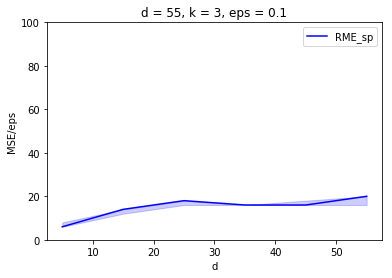

<Figure size 432x288 with 0 Axes>

In [9]:
plot_m_loss.plotxy('d', d_bounds, (0,100))

In [12]:
"Loss vs eps"

il.reload(rl)

trials = 10
d, k, m = 100, 1, 1000
eps_bounds = (0, 0.5, 0.01)
# model = rl.DenseNoiseModel(-100)

model = rl.TailFilpModel()
keys = [rl.Oracle]
model_params = rl.Params(d=d, k=k, m=m)
ylims = (0, 1)

def err(a,b): return LA.norm(a-b)

plot_m_loss = rl.plot(model, model_params, err, keys)
plot_m_loss.setdata('eps', eps_bounds, trials, ylims)

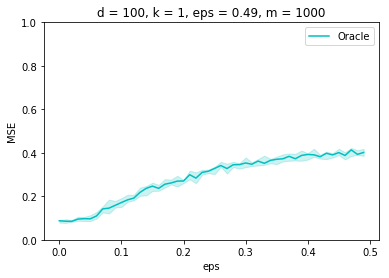

<Figure size 432x288 with 0 Axes>

In [13]:
plot_m_loss.plotxy('eps', eps_bounds, (0,1))

In [89]:
"Loss vs sparsity"
il.reload(rl)

trials = 5
d, eps, m = 1000, 0.1, 20000
k_bounds = (50, 200, 25)

# model = rl.DenseNoiseModel(-2)
model = rl.BimodalModel()

keys = [rl.RME_sp, rl.NP_sp, rl.RME, rl.RME_sp_L, rl.ransacGaussianMean]
model_params = rl.Params(d = d, eps = eps, m = m)
ylims = (0, 1)

def err(a,b): return LA.norm(a-b)

plot_m_loss = rl.plot(model, model_params, err, keys)
plot_m_loss.setdata('k', k_bounds, trials, ylims)

Linear filter...
Filtered out 0/19982, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/19982, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 1030/19982, 0.0 false (0.00 vs 0.1)
condition 18952 19982
Linear filter...
Filtered out 0/18952, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 913/18952, 0.0 false (0.00 vs 0.1)
condition 18039 18952
Quadratic filter...
Filtered out 0/18039, 0.0 false (nan vs 0.1)
condition 18039 18039
Could not filter
Linear filter...
Filtered out 1122/19982, 114.0 false (0.10 vs 0.1)
Linear filter...
Filtered out 291/18860, 155.0 false (0.53 vs 0.1)
Linear filter...
Filtered out 278/18569, 157.0 false (0.56 vs 0.1)
Linear filter...
Filtered out 240/18291, 148.0 false (0.62 vs 0.1)
Linear filter...
Filtered out 204/18051, 122.0 false (0.60 vs 0.1)
Linear filter...
Filtered out 179/17847, 102.0 false (0.57 vs 0.1)
Linear filter...
Filtered out 191/17668, 128.0 false (0.67 vs 0.1)
Linear filter...
Filtered out 159/17477, 116.0 false (0.73 

Linear filter...
Filtered out 79/9763, 79.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 93/9684, 93.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 106/9591, 106.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 63/9485, 63.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 99/9422, 99.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 92/9323, 92.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 110/9231, 110.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 100/9121, 100.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 61/9021, 61.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 117/8960, 117.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 88/8843, 88.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 117/8755, 117.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 96/8638, 96.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 135/8542, 135.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 106/8407, 106.0 false (1.00 vs 0.1)
Linear filter...
Filtered 

Linear filter...
Filtered out 32/14147, 32.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 36/14115, 34.0 false (0.94 vs 0.1)
Linear filter...
Filtered out 53/14079, 53.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 36/14026, 35.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 28/13990, 27.0 false (0.96 vs 0.1)
Linear filter...
Filtered out 52/13962, 51.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 47/13910, 46.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 51/13863, 50.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 30/13812, 30.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 53/13782, 53.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 59/13729, 59.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 72/13670, 72.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 72/13598, 71.0 false (0.99 vs 0.1)
Linear filter...
Filtered out 53/13526, 53.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 55/13473, 54.0 false (0.98 vs 0.1)
Linear filter...
Filtered

Linear filter...
Filtered out 287/2084, 287.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 269/1797, 269.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 253/1528, 253.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 264/1275, 264.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 237/1011, 237.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 209/774, 209.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 191/565, 191.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 163/374, 163.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 124/211, 124.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/87, 0.0 false (nan vs 0.1)
Could not filter
Linear filter...
Filtered out 0/19974, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/19974, 0.0 false (nan vs 0.1)
Could not filter
ransacN 9987
Linear filter...
Filtered out 0/19989, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/19989, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 1003/19989, 0.0 false (

Linear filter...
Filtered out 60/10973, 60.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 77/10913, 77.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 66/10836, 66.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 96/10770, 96.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 41/10674, 41.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 69/10633, 69.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 78/10564, 78.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 39/10486, 39.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 77/10447, 77.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 70/10370, 70.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 45/10300, 45.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 99/10255, 99.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 61/10156, 61.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 67/10095, 67.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 78/10028, 78.0 false (1.00 vs 0.1)
Linear filter...
Filtered

Linear filter...
Filtered out 54/15086, 51.0 false (0.94 vs 0.1)
Linear filter...
Filtered out 48/15032, 44.0 false (0.92 vs 0.1)
Linear filter...
Filtered out 61/14984, 58.0 false (0.95 vs 0.1)
Linear filter...
Filtered out 63/14923, 60.0 false (0.95 vs 0.1)
Linear filter...
Filtered out 73/14860, 70.0 false (0.96 vs 0.1)
Linear filter...
Filtered out 91/14787, 88.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 81/14696, 78.0 false (0.96 vs 0.1)
Linear filter...
Filtered out 71/14615, 71.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 54/14544, 53.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 52/14490, 51.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 48/14438, 47.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 55/14390, 54.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 59/14335, 57.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 52/14276, 50.0 false (0.96 vs 0.1)
Linear filter...
Filtered out 56/14224, 54.0 false (0.96 vs 0.1)
Linear filter...
Filtered

Linear filter...
Filtered out 133/5671, 133.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 146/5538, 146.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 118/5392, 118.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 139/5274, 139.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 157/5135, 157.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 167/4978, 167.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 141/4811, 141.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 230/4670, 230.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 181/4440, 181.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 199/4259, 199.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 224/4060, 224.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 218/3836, 218.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 226/3618, 226.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 224/3392, 224.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 252/3168, 252.0 false (1.00 vs 0.1)
Linear fil

Linear filter...
Filtered out 57/11782, 57.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 77/11725, 77.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 88/11648, 88.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 37/11560, 37.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 57/11523, 57.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 79/11466, 79.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 27/11387, 27.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 92/11360, 92.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 61/11268, 61.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 41/11207, 41.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 90/11166, 90.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 111/11076, 111.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 109/10965, 109.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 82/10856, 82.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 100/10774, 100.0 false (1.00 vs 0.1)
Linear filter...
Fi

Linear filter...
Filtered out 107/15680, 98.0 false (0.92 vs 0.1)
Linear filter...
Filtered out 82/15573, 74.0 false (0.90 vs 0.1)
Linear filter...
Filtered out 42/15491, 41.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 51/15449, 49.0 false (0.96 vs 0.1)
Linear filter...
Filtered out 76/15398, 70.0 false (0.92 vs 0.1)
Linear filter...
Filtered out 45/15322, 42.0 false (0.93 vs 0.1)
Linear filter...
Filtered out 64/15277, 60.0 false (0.94 vs 0.1)
Linear filter...
Filtered out 41/15213, 39.0 false (0.95 vs 0.1)
Linear filter...
Filtered out 62/15172, 59.0 false (0.95 vs 0.1)
Linear filter...
Filtered out 36/15110, 34.0 false (0.94 vs 0.1)
Linear filter...
Filtered out 71/15074, 69.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 95/15003, 92.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 64/14908, 62.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 77/14844, 74.0 false (0.96 vs 0.1)
Linear filter...
Filtered out 29/14767, 27.0 false (0.93 vs 0.1)
Linear filter...
Filtere

Linear filter...
Filtered out 118/6497, 118.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 109/6379, 109.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 115/6270, 115.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 144/6155, 144.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 172/6011, 172.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 131/5839, 131.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 154/5708, 154.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 155/5554, 155.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 165/5399, 165.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 146/5234, 146.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 172/5088, 172.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 204/4916, 204.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 174/4712, 174.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 188/4538, 188.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 187/4350, 187.0 false (1.00 vs 0.1)
Linear fil

Linear filter...
Filtered out 67/16539, 53.0 false (0.79 vs 0.1)
Linear filter...
Filtered out 119/16472, 94.0 false (0.79 vs 0.1)
Linear filter...
Filtered out 88/16353, 74.0 false (0.84 vs 0.1)
Linear filter...
Filtered out 33/16265, 24.0 false (0.73 vs 0.1)
Linear filter...
Filtered out 98/16232, 90.0 false (0.92 vs 0.1)
Linear filter...
Filtered out 40/16134, 31.0 false (0.78 vs 0.1)
Linear filter...
Filtered out 106/16094, 85.0 false (0.80 vs 0.1)
Linear filter...
Filtered out 85/15988, 75.0 false (0.88 vs 0.1)
Linear filter...
Filtered out 102/15903, 92.0 false (0.90 vs 0.1)
Linear filter...
Filtered out 129/15801, 118.0 false (0.91 vs 0.1)
Linear filter...
Filtered out 42/15672, 40.0 false (0.95 vs 0.1)
Linear filter...
Filtered out 88/15630, 85.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 69/15542, 65.0 false (0.94 vs 0.1)
Linear filter...
Filtered out 103/15473, 100.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 75/15370, 74.0 false (0.99 vs 0.1)
Linear filter...
F

Linear filter...
Filtered out 123/7614, 123.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 98/7491, 98.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 106/7393, 106.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 107/7287, 107.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 123/7180, 123.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 144/7057, 144.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 95/6913, 95.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 136/6818, 136.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 127/6682, 127.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 135/6555, 135.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 136/6420, 136.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 133/6284, 133.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 162/6151, 162.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 144/5989, 144.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 159/5845, 159.0 false (1.00 vs 0.1)
Linear filter.

Linear filter...
Filtered out 85/12640, 85.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 70/12555, 70.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 80/12485, 80.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 48/12405, 48.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 59/12357, 58.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 72/12298, 72.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 64/12226, 64.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 82/12162, 82.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 75/12080, 75.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 48/12005, 48.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 30/11957, 30.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 52/11927, 52.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 65/11875, 65.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 78/11810, 78.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 59/11732, 59.0 false (1.00 vs 0.1)
Linear filter...
Filtered

Linear filter...
Filtered out 192/17879, 113.0 false (0.59 vs 0.1)
Linear filter...
Filtered out 147/17687, 105.0 false (0.71 vs 0.1)
Linear filter...
Filtered out 172/17540, 125.0 false (0.73 vs 0.1)
Linear filter...
Filtered out 139/17368, 92.0 false (0.66 vs 0.1)
Linear filter...
Filtered out 111/17229, 77.0 false (0.69 vs 0.1)
Linear filter...
Filtered out 169/17118, 130.0 false (0.77 vs 0.1)
Linear filter...
Filtered out 103/16949, 81.0 false (0.79 vs 0.1)
Linear filter...
Filtered out 106/16846, 82.0 false (0.77 vs 0.1)
Linear filter...
Filtered out 115/16740, 93.0 false (0.81 vs 0.1)
Linear filter...
Filtered out 149/16625, 118.0 false (0.79 vs 0.1)
Linear filter...
Filtered out 87/16476, 64.0 false (0.74 vs 0.1)
Linear filter...
Filtered out 71/16389, 63.0 false (0.89 vs 0.1)
Linear filter...
Filtered out 124/16318, 112.0 false (0.90 vs 0.1)
Linear filter...
Filtered out 32/16194, 28.0 false (0.88 vs 0.1)
Linear filter...
Filtered out 125/16162, 109.0 false (0.87 vs 0.1)
Linear

Linear filter...
Filtered out 97/8902, 97.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 100/8805, 100.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 124/8705, 124.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 127/8581, 127.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 104/8454, 104.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 115/8350, 115.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 80/8235, 80.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 125/8155, 125.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 87/8030, 87.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 86/7943, 86.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 120/7857, 120.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 158/7737, 158.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 92/7579, 92.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 102/7487, 102.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 136/7385, 136.0 false (1.00 vs 0.1)
Linear filter...
Fil

Linear filter...
Filtered out 75/13360, 74.0 false (0.99 vs 0.1)
Linear filter...
Filtered out 57/13285, 57.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 27/13228, 26.0 false (0.96 vs 0.1)
Linear filter...
Filtered out 28/13201, 27.0 false (0.96 vs 0.1)
Linear filter...
Filtered out 72/13173, 71.0 false (0.99 vs 0.1)
Linear filter...
Filtered out 65/13101, 65.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 53/13036, 52.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 25/12983, 23.0 false (0.92 vs 0.1)
Linear filter...
Filtered out 59/12958, 59.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 57/12899, 57.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 41/12842, 41.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 63/12801, 63.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 93/12738, 93.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 25/12645, 25.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 11/12620, 11.0 false (1.00 vs 0.1)
Linear filter...
Filtered

Linear filter...
Filtered out 0/18960, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/18960, 0.0 false (nan vs 0.1)
condition 18960 18960
Could not filter
Linear filter...
Filtered out 1100/19989, 92.0 false (0.08 vs 0.1)
Linear filter...
Filtered out 190/18889, 92.0 false (0.48 vs 0.1)
Linear filter...
Filtered out 210/18699, 110.0 false (0.52 vs 0.1)
Linear filter...
Filtered out 212/18489, 128.0 false (0.60 vs 0.1)
Linear filter...
Filtered out 184/18277, 125.0 false (0.68 vs 0.1)
Linear filter...
Filtered out 131/18093, 87.0 false (0.66 vs 0.1)
Linear filter...
Filtered out 161/17962, 109.0 false (0.68 vs 0.1)
Linear filter...
Filtered out 171/17801, 118.0 false (0.69 vs 0.1)
Linear filter...
Filtered out 118/17630, 81.0 false (0.69 vs 0.1)
Linear filter...
Filtered out 156/17512, 104.0 false (0.67 vs 0.1)
Linear filter...
Filtered out 140/17356, 101.0 false (0.72 vs 0.1)
Linear filter...
Filtered out 114/17216, 87.0 false (0.76 vs 0.1)
Linear filter...
Filtered out 124/

Linear filter...
Filtered out 107/9061, 106.0 false (0.99 vs 0.1)
Linear filter...
Filtered out 73/8954, 73.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 117/8881, 117.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 101/8764, 101.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 54/8663, 54.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 87/8609, 87.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 143/8522, 143.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 102/8379, 102.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 105/8277, 105.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 124/8172, 124.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 87/8048, 87.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 121/7961, 121.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 103/7840, 103.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 126/7737, 126.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 103/7611, 103.0 false (1.00 vs 0.1)
Linear filter...
F

Linear filter...
Filtered out 88/13541, 88.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 5/13453, 5.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 73/13448, 71.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 98/13375, 98.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 15/13277, 15.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 40/13262, 40.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 45/13222, 45.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 73/13177, 73.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 37/13104, 36.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 53/13067, 53.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 63/13014, 63.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 39/12951, 39.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 61/12912, 60.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 21/12851, 21.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 46/12830, 45.0 false (0.98 vs 0.1)
Linear filter...
Filtered o

Quadratic filter...
Filtered out 0/18038, 0.0 false (nan vs 0.1)
condition 18038 18038
Could not filter
Linear filter...
Filtered out 1136/19982, 127.0 false (0.11 vs 0.1)
Linear filter...
Filtered out 256/18846, 136.0 false (0.53 vs 0.1)
Linear filter...
Filtered out 236/18590, 133.0 false (0.56 vs 0.1)
Linear filter...
Filtered out 207/18354, 126.0 false (0.61 vs 0.1)
Linear filter...
Filtered out 197/18147, 122.0 false (0.62 vs 0.1)
Linear filter...
Filtered out 164/17950, 101.0 false (0.62 vs 0.1)
Linear filter...
Filtered out 176/17786, 111.0 false (0.63 vs 0.1)
Linear filter...
Filtered out 158/17610, 104.0 false (0.66 vs 0.1)
Linear filter...
Filtered out 165/17452, 121.0 false (0.73 vs 0.1)
Linear filter...
Filtered out 174/17287, 129.0 false (0.74 vs 0.1)
Linear filter...
Filtered out 125/17113, 94.0 false (0.75 vs 0.1)
Linear filter...
Filtered out 132/16988, 98.0 false (0.74 vs 0.1)
Linear filter...
Filtered out 150/16856, 122.0 false (0.81 vs 0.1)
Linear filter...
Filtered 

Linear filter...
Filtered out 104/8715, 104.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 111/8611, 111.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 84/8500, 84.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 56/8416, 56.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 74/8360, 74.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 120/8286, 120.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 79/8166, 79.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 101/8087, 101.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 134/7986, 134.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 126/7852, 126.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 103/7726, 103.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 136/7623, 136.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 133/7487, 133.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 185/7354, 185.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 133/7169, 133.0 false (1.00 vs 0.1)
Linear filter...
F

Linear filter...
Filtered out 56/13294, 56.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 101/13238, 101.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 95/13137, 95.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 74/13042, 74.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 95/12968, 95.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 59/12873, 59.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 60/12814, 59.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 51/12754, 51.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 27/12703, 27.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 92/12676, 92.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 93/12584, 93.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 56/12491, 56.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 108/12435, 108.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 92/12327, 92.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 42/12235, 42.0 false (1.00 vs 0.1)
Linear filter...
Filt

Linear filter...
Filtered out 1123/19987, 117.0 false (0.10 vs 0.1)
Linear filter...
Filtered out 248/18864, 145.0 false (0.58 vs 0.1)
Linear filter...
Filtered out 218/18616, 114.0 false (0.52 vs 0.1)
Linear filter...
Filtered out 253/18398, 157.0 false (0.62 vs 0.1)
Linear filter...
Filtered out 221/18145, 143.0 false (0.65 vs 0.1)
Linear filter...
Filtered out 150/17924, 87.0 false (0.58 vs 0.1)
Linear filter...
Filtered out 140/17774, 88.0 false (0.63 vs 0.1)
Linear filter...
Filtered out 124/17634, 76.0 false (0.61 vs 0.1)
Linear filter...
Filtered out 163/17510, 125.0 false (0.77 vs 0.1)
Linear filter...
Filtered out 127/17347, 90.0 false (0.71 vs 0.1)
Linear filter...
Filtered out 135/17220, 100.0 false (0.74 vs 0.1)
Linear filter...
Filtered out 107/17085, 78.0 false (0.73 vs 0.1)
Linear filter...
Filtered out 139/16978, 112.0 false (0.81 vs 0.1)
Linear filter...
Filtered out 114/16839, 94.0 false (0.82 vs 0.1)
Linear filter...
Filtered out 101/16725, 74.0 false (0.73 vs 0.1)
L

Linear filter...
Filtered out 24/12775, 24.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 53/12751, 53.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 52/12698, 52.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 70/12646, 69.0 false (0.99 vs 0.1)
Linear filter...
Filtered out 55/12576, 55.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 47/12521, 47.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 78/12474, 78.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 43/12396, 43.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 80/12353, 80.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 37/12273, 36.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 54/12236, 54.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 54/12182, 54.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 48/12128, 48.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 32/12080, 32.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 41/12048, 40.0 false (0.98 vs 0.1)
Linear filter...
Filtered

Linear filter...
Filtered out 141/17479, 99.0 false (0.70 vs 0.1)
Linear filter...
Filtered out 96/17338, 66.0 false (0.69 vs 0.1)
Linear filter...
Filtered out 166/17242, 122.0 false (0.73 vs 0.1)
Linear filter...
Filtered out 102/17076, 84.0 false (0.82 vs 0.1)
Linear filter...
Filtered out 186/16974, 142.0 false (0.76 vs 0.1)
Linear filter...
Filtered out 143/16788, 114.0 false (0.80 vs 0.1)
Linear filter...
Filtered out 102/16645, 82.0 false (0.80 vs 0.1)
Linear filter...
Filtered out 104/16543, 84.0 false (0.81 vs 0.1)
Linear filter...
Filtered out 94/16439, 67.0 false (0.71 vs 0.1)
Linear filter...
Filtered out 155/16345, 133.0 false (0.86 vs 0.1)
Linear filter...
Filtered out 104/16190, 92.0 false (0.88 vs 0.1)
Linear filter...
Filtered out 78/16086, 67.0 false (0.86 vs 0.1)
Linear filter...
Filtered out 49/16008, 40.0 false (0.82 vs 0.1)
Linear filter...
Filtered out 67/15959, 58.0 false (0.87 vs 0.1)
Linear filter...
Filtered out 61/15892, 54.0 false (0.89 vs 0.1)
Linear filte

Linear filter...
Filtered out 78/7829, 78.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 145/7751, 145.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 101/7606, 101.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 110/7505, 110.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 145/7395, 145.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 118/7250, 118.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 132/7132, 132.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 97/7000, 97.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 111/6903, 111.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 146/6792, 146.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 132/6646, 132.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 137/6514, 137.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 109/6377, 109.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 171/6268, 171.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 150/6097, 150.0 false (1.00 vs 0.1)
Linear filter.

Linear filter...
Filtered out 43/12904, 43.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 54/12861, 54.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 91/12807, 91.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 36/12716, 36.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 57/12680, 56.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 80/12623, 80.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 78/12543, 78.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 52/12465, 52.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 37/12413, 36.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 14/12376, 14.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 94/12362, 94.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 44/12268, 44.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 42/12224, 42.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 61/12182, 61.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 87/12121, 87.0 false (1.00 vs 0.1)
Linear filter...
Filtered

Linear filter...
Filtered out 261/18564, 147.0 false (0.56 vs 0.1)
Linear filter...
Filtered out 212/18303, 131.0 false (0.62 vs 0.1)
Linear filter...
Filtered out 213/18091, 131.0 false (0.62 vs 0.1)
Linear filter...
Filtered out 173/17878, 102.0 false (0.59 vs 0.1)
Linear filter...
Filtered out 175/17705, 113.0 false (0.65 vs 0.1)
Linear filter...
Filtered out 217/17530, 154.0 false (0.71 vs 0.1)
Linear filter...
Filtered out 149/17313, 104.0 false (0.70 vs 0.1)
Linear filter...
Filtered out 151/17164, 109.0 false (0.72 vs 0.1)
Linear filter...
Filtered out 150/17013, 108.0 false (0.72 vs 0.1)
Linear filter...
Filtered out 138/16863, 114.0 false (0.83 vs 0.1)
Linear filter...
Filtered out 96/16725, 75.0 false (0.78 vs 0.1)
Linear filter...
Filtered out 119/16629, 93.0 false (0.78 vs 0.1)
Linear filter...
Filtered out 92/16510, 77.0 false (0.84 vs 0.1)
Linear filter...
Filtered out 112/16418, 97.0 false (0.87 vs 0.1)
Linear filter...
Filtered out 85/16306, 66.0 false (0.78 vs 0.1)
Lin

Linear filter...
Filtered out 93/9395, 93.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 102/9302, 102.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 84/9200, 84.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 115/9116, 115.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 95/9001, 95.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 60/8906, 60.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 87/8846, 87.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 83/8759, 83.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 73/8676, 73.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 86/8603, 86.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 110/8517, 110.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 69/8407, 69.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 67/8338, 67.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 63/8271, 63.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 95/8208, 95.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 78/8

Linear filter...
Filtered out 89/13830, 87.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 60/13741, 60.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 50/13681, 50.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 55/13631, 55.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 79/13576, 79.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 50/13497, 49.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 48/13447, 48.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 79/13399, 79.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 64/13320, 64.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 77/13256, 77.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 49/13179, 49.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 63/13130, 63.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 29/13067, 29.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 107/13038, 106.0 false (0.99 vs 0.1)
Linear filter...
Filtered out 55/12931, 55.0 false (1.00 vs 0.1)
Linear filter...
Filter

Linear filter...
Filtered out 120/258, 120.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 82/138, 82.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/56, 0.0 false (nan vs 0.1)
Could not filter
Linear filter...
Filtered out 0/19989, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/19989, 0.0 false (nan vs 0.1)
Could not filter
ransacN 9994
Linear filter...
Filtered out 0/19977, 0.0 false (nan vs 0.1)
Linear filter...
Filtered out 0/19977, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 1002/19977, 2.0 false (0.00 vs 0.1)
condition 18975 19977
Linear filter...
Filtered out 0/18975, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 712/18975, 0.0 false (0.00 vs 0.1)
condition 18263 18975
Linear filter...
Filtered out 0/18263, 0.0 false (nan vs 0.1)
Quadratic filter...
Filtered out 0/18263, 0.0 false (nan vs 0.1)
condition 18263 18263
Could not filter
Linear filter...
Filtered out 1109/19977, 104.0 false (0.09 vs 0.1)
Linear filter...
Filtered out 264/18868, 

Linear filter...
Filtered out 71/10520, 71.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 87/10449, 87.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 88/10362, 88.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 33/10274, 33.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 24/10241, 24.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 78/10217, 78.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 45/10139, 45.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 112/10094, 112.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 64/9982, 64.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 44/9918, 44.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 56/9874, 56.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 46/9818, 46.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 66/9772, 66.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 81/9706, 81.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 53/9625, 53.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 

Linear filter...
Filtered out 51/14616, 49.0 false (0.96 vs 0.1)
Linear filter...
Filtered out 87/14565, 86.0 false (0.99 vs 0.1)
Linear filter...
Filtered out 66/14478, 65.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 63/14412, 63.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 95/14349, 94.0 false (0.99 vs 0.1)
Linear filter...
Filtered out 70/14254, 67.0 false (0.96 vs 0.1)
Linear filter...
Filtered out 82/14184, 80.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 55/14102, 54.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 31/14047, 30.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 57/14016, 57.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 65/13959, 65.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 93/13894, 92.0 false (0.99 vs 0.1)
Linear filter...
Filtered out 52/13801, 52.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 41/13749, 41.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 66/13708, 66.0 false (1.00 vs 0.1)
Linear filter...
Filtered

Linear filter...
Filtered out 226/3143, 226.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 251/2917, 251.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 282/2666, 282.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 244/2384, 244.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 259/2140, 259.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 270/1881, 270.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 257/1611, 257.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 249/1354, 249.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 246/1105, 246.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 252/859, 252.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 208/607, 208.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 164/399, 164.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 120/235, 120.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 0/115, 0.0 false (nan vs 0.1)
Could not filter
Linear filter...
Filtered out 663/19987, 2.0 false (0.00 vs 0.1)
Line

Linear filter...
Filtered out 68/11126, 68.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 33/11058, 33.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 60/11025, 60.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 80/10965, 80.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 68/10885, 68.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 101/10817, 101.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 65/10716, 65.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 92/10651, 92.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 59/10559, 59.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 64/10500, 64.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 113/10436, 113.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 88/10323, 88.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 95/10235, 95.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 109/10140, 109.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 98/10031, 98.0 false (1.00 vs 0.1)
Linear filter...
Fi

Linear filter...
Filtered out 62/15169, 59.0 false (0.95 vs 0.1)
Linear filter...
Filtered out 37/15107, 35.0 false (0.95 vs 0.1)
Linear filter...
Filtered out 61/15070, 61.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 63/15009, 60.0 false (0.95 vs 0.1)
Linear filter...
Filtered out 45/14946, 43.0 false (0.96 vs 0.1)
Linear filter...
Filtered out 74/14901, 74.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 66/14827, 62.0 false (0.94 vs 0.1)
Linear filter...
Filtered out 46/14761, 45.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 69/14715, 67.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 36/14646, 35.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 41/14610, 41.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 63/14569, 62.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 53/14506, 52.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 45/14453, 42.0 false (0.93 vs 0.1)
Linear filter...
Filtered out 30/14408, 30.0 false (1.00 vs 0.1)
Linear filter...
Filtered

Linear filter...
Filtered out 155/4618, 155.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 221/4463, 221.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 180/4242, 180.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 182/4062, 182.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 181/3880, 181.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 198/3699, 198.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 234/3501, 234.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 215/3267, 215.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 233/3052, 233.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 223/2819, 223.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 242/2596, 242.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 247/2354, 247.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 261/2107, 261.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 235/1846, 235.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 246/1611, 246.0 false (1.00 vs 0.1)
Linear fil

Linear filter...
Filtered out 18/11297, 18.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 56/11279, 56.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 81/11223, 81.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 121/11142, 121.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 51/11021, 51.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 51/10970, 51.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 104/10919, 104.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 90/10815, 90.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 63/10725, 63.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 77/10662, 77.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 53/10585, 53.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 42/10532, 42.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 40/10490, 40.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 67/10450, 67.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 59/10383, 59.0 false (1.00 vs 0.1)
Linear filter...
Filt

Linear filter...
Filtered out 59/15472, 58.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 60/15413, 59.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 93/15353, 91.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 75/15260, 71.0 false (0.95 vs 0.1)
Linear filter...
Filtered out 77/15185, 76.0 false (0.99 vs 0.1)
Linear filter...
Filtered out 63/15108, 61.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 36/15045, 35.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 47/15009, 46.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 62/14962, 61.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 45/14900, 44.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 34/14855, 33.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 60/14821, 59.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 43/14761, 43.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 71/14718, 69.0 false (0.97 vs 0.1)
Linear filter...
Filtered out 34/14647, 33.0 false (0.97 vs 0.1)
Linear filter...
Filtered

Linear filter...
Filtered out 191/5676, 191.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 168/5485, 168.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 149/5317, 149.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 184/5168, 184.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 152/4984, 152.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 126/4832, 126.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 162/4706, 162.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 162/4544, 162.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 215/4382, 215.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 171/4167, 171.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 194/3996, 194.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 213/3802, 213.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 244/3589, 244.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 238/3345, 238.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 265/3107, 265.0 false (1.00 vs 0.1)
Linear fil

Linear filter...
Filtered out 88/12202, 88.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 94/12114, 94.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 54/12020, 54.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 106/11966, 106.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 76/11860, 76.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 111/11784, 111.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 67/11673, 67.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 73/11606, 73.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 67/11533, 67.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 85/11466, 85.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 90/11381, 90.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 55/11291, 55.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 53/11236, 53.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 105/11183, 104.0 false (0.99 vs 0.1)
Linear filter...
Filtered out 55/11078, 55.0 false (1.00 vs 0.1)
Linear filter...
Fi

Linear filter...
Filtered out 74/15964, 67.0 false (0.91 vs 0.1)
Linear filter...
Filtered out 84/15890, 70.0 false (0.83 vs 0.1)
Linear filter...
Filtered out 33/15806, 31.0 false (0.94 vs 0.1)
Linear filter...
Filtered out 59/15773, 51.0 false (0.86 vs 0.1)
Linear filter...
Filtered out 55/15714, 48.0 false (0.87 vs 0.1)
Linear filter...
Filtered out 48/15659, 44.0 false (0.92 vs 0.1)
Linear filter...
Filtered out 22/15611, 16.0 false (0.73 vs 0.1)
Linear filter...
Filtered out 77/15589, 72.0 false (0.94 vs 0.1)
Linear filter...
Filtered out 53/15512, 47.0 false (0.89 vs 0.1)
Linear filter...
Filtered out 19/15459, 18.0 false (0.95 vs 0.1)
Linear filter...
Filtered out 79/15440, 75.0 false (0.95 vs 0.1)
Linear filter...
Filtered out 79/15361, 75.0 false (0.95 vs 0.1)
Linear filter...
Filtered out 51/15282, 51.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 47/15231, 44.0 false (0.94 vs 0.1)
Linear filter...
Filtered out 42/15184, 42.0 false (1.00 vs 0.1)
Linear filter...
Filtered

Linear filter...
Filtered out 108/7594, 108.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 127/7486, 127.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 99/7359, 99.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 137/7260, 137.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 155/7123, 155.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 95/6968, 95.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 160/6873, 160.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 168/6713, 168.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 101/6545, 101.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 110/6444, 110.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 130/6334, 130.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 162/6204, 162.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 161/6042, 161.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 146/5881, 146.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 124/5735, 124.0 false (1.00 vs 0.1)
Linear filter.

Linear filter...
Filtered out 72/12482, 71.0 false (0.99 vs 0.1)
Linear filter...
Filtered out 78/12410, 77.0 false (0.99 vs 0.1)
Linear filter...
Filtered out 53/12332, 52.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 78/12279, 78.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 98/12201, 98.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 65/12103, 64.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 46/12038, 46.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 60/11992, 60.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 61/11932, 61.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 106/11871, 104.0 false (0.98 vs 0.1)
Linear filter...
Filtered out 26/11765, 26.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 60/11739, 60.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 65/11679, 65.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 51/11614, 51.0 false (1.00 vs 0.1)
Linear filter...
Filtered out 75/11563, 75.0 false (1.00 vs 0.1)
Linear filter...
Filter

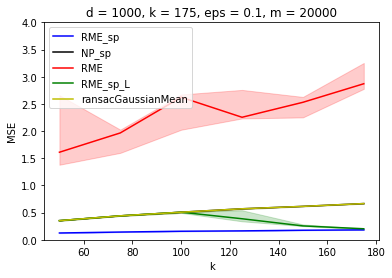

<Figure size 432x288 with 0 Axes>

In [94]:
plot_m_loss.plotxy('k', k_bounds, (0,4))

In [40]:
"<<<< ALL RELEVANT PLOTS SHOULD BE ABOVE >>>>"

'<<<< ALL RELEVANT PLOTS SHOULD BE ABOVE >>>>'

In [ ]:
d = 100
k = 70
eps = 0.1
tau = 0.02 # Failure prob
# sample_size = int(4*((k**2)*np.log(d) + np.log(1/tau))*(1/eps**2))
m = 9000

true_mean = np.append(np.ones(k), np.zeros(d-k))
false_mean = np.append(np.zeros(d-k), np.ones(k))

tm = np.append(np.ones(k), np.zeros(d-k))
fm = np.append(np.zeros(d-k), np.ones(k))

cov = 2*np.identity(d) - np.diag(tm)

G = np.random.randn(m, d) + tm/LA.norm(tm)
G2 = np.random.multivariate_normal(np.zeros(d), cov, (m,))
G1 = np.random.multivariate_normal(np.zeros(d), cov, (m,))

# G1 = np.random.multivariate_normal(np.zeros(d), cov, (sample_size,))



print(G.shape)
S = G.copy()

indicator = np.zeros(len(S))
L = int(m*(1-eps))
M = int((L + m)/2)

S[L:M] = G1[L:M]
S[M:] = G2[M:]

# S[int(sample_size*(1-eps)):] += false_mean - true_mean
# S[int(sample_size*(1-eps)):] = true_mean + 4.1
indicator[:L] = 1
# print(sum(indicator))
# print(len(indicator))
# print(indicator)
# print(len(S))

params = S, indicator, k, eps, tau
# params =  (G.copy(), S.copy(), indicator, m, d, eps, tau)


In [ ]:
il.reload(rl)
# print("Dense mean estimation:", LA.norm(true_mean - rl.RME(params, plot=1)))
# print("Linear only:", LA.norm(true_mean - rl.RME_sp_L(params, plotl=1, plotc=0)))
# ans = rl.RME_sp_L(params, plotl=0, plotc=0)
print("Quadratic:", LA.norm(tm/LA.norm(tm) - rl.RME_sp(params, plotl=0, plotc=1, fdr=0.3)))
ans = rl.RME_sp(params, plotl=0, plotc=1, fdr=0.9)
print("fraction of zeros", len(ans[ans==0])/len(ans))
# print(tm)
# print("Ransac", LA.norm(true_mean - rl.ransacGaussianMean(params)))

In [ ]:
plt.close()

In [ ]:
il.reload(rl)

s = 10
m = 100
params = (3, m, 0.2, 0.02)
bounds = (5, 10, 10)
Runs = [rl.sparse_eps(params, bounds) for i in range(s)]

In [ ]:
# fig1, ax1 = plt.subplots()
cols = {'RME_sp':'b', 'RME_sp_L':'g', 'RME':'r'}
for key in ['RME_sp', 'RME_sp_L']:#,'rl.ransacGaussianMean']:
#     for d in bounds[2]*np.arange(bounds[0], bounds[1]):

#         ax1.boxplot(np.array([res[key+str(eps)] for res in Runs]).transpose(), showfliers=False, whis = 0)
    A = np.array([res[key] for res in Runs])
    plt.plot(bounds[2]*np.arange(bounds[0], bounds[1]), np.array(np.median(A,axis = 0)), label=key, color = cols[key])
    mins = [np.sort(x)[int(s*0.25)] for x in A.T]
    maxs = [np.sort(x)[int(s*0.75)] for x in A.T]
    plt.fill_between(bounds[2]*np.arange(bounds[0], bounds[1]), mins, maxs, color=cols[key], alpha=0.2)
plt.title('k={}, naive filter algorithm'.format(params[0]))
plt.xlabel('dimension')
plt.ylabel('L2 - loss, scaled by eps')
plt.legend()

# for key in ['RME_sp', 'oracle', 'NP_sp']:
    
#     x = []
#     for d in  bounds[2]*np.arange(bounds[0], bounds[1]):
#         x.append(res[key+str(d)])
#     plt.plot(bounds[2]*np.arange(bounds[0], bounds[1]), x, label=key)

# #plt.plot(bounds[2]*np.arange(bounds[0], bounds[1]),np.sqrt(bounds[2]*np.arange(bounds[0], bounds[1])), label='sqrt')
# plt.title('k={}, naive filter algorithm'.format(params[0]))
# plt.xlabel('dimension')
# plt.ylabel('L2 - loss, scaled by eps')
# plt.legend()

In [ ]:
il.reload(rl)
d = 100
k = 10
eps = 0.1
m = 100
s = 10

params = (d, k, m, eps, 0.02)
bounds = (0, 0.9, 0.1)
Runs = [rl.sparse_eps_dist(params, bounds) for i in range(s)]

In [ ]:
cols = {'RME_sp':'b', 'RME_sp_L':'g', 'RME':'r'}
for key in ['RME_sp', 'RME_sp_L']:#,'rl.ransacGaussianMean']:
#     for d in bounds[2]*np.arange(bounds[0], bounds[1]):

#         ax1.boxplot(np.array([res[key+str(eps)] for res in Runs]).transpose(), showfliers=False, whis = 0)
    A = np.array([res[key] for res in Runs])
    plt.plot(np.arange(bounds[0], bounds[1], bounds[2]), np.array(np.median(A,axis = 0)), label=key, color = cols[key])
    mins = [np.sort(x)[int(s*0.25)] for x in A.T]
    maxs = [np.sort(x)[int(s*0.75)] for x in A.T]
    plt.fill_between(np.arange(bounds[0], bounds[1], bounds[2]), mins, maxs, color=cols[key], alpha=0.2)
plt.title('d = {}, k = {}, m = {}, eps = {}'.format(params[0], params[1], params[2], params[3]))
plt.xlabel('distance')
plt.ylabel('(loss)/eps')
plt.legend()



# for key in ['rl.RME_sp','rl.NP_sp', 'rl.ransacGaussianMean']:
#     x = []
#     for d in np.arange(bounds[0], bounds[1], bounds[2]):
#         x.append(np.array(res[key+str(d)]) - np.array(res['oracle'+str(d)]))
#     plt.plot(np.arange(bounds[0], bounds[1], bounds[2]), x, label=key)

# plt.title('d = {}, k = {}, m = {}, eps = {}'.format(params[0], params[1], params[2], params[3]))
# plt.xlabel('distance')
# plt.ylabel('(loss-(oracle loss))/eps')
# plt.legend()

In [ ]:
def sparse_eps_eta(params, step): 
    (d, k, m, dist, tau) = params
    
    results = {}

    for eps in np.arange(step, 0.5, step):
        
        true_mean = np.append(np.ones(k),np.zeros(d-k))
#        true_mean = 0
        G = np.random.randn(m, d) + true_mean

        true_mean = np.append(np.ones(k),np.zeros(d-k))
        false_mean = np.append(np.zeros(d-k), np.ones(k))
#        true_mean = 0
        G = np.random.randn(m, d) + true_mean

        S = G.copy()
#        S[int(m*(1-eps)):] = true_mean + dist
        S[int(m*(1-eps)):] += dist*false_mean + true_mean
        indicator = np.ones(len(S))
        indicator[int(m*(1-eps)):] = 0

        params = (S.copy(), indicator, k, eps, tau)

        mu_o = np.mean(S[:int(m*(1-eps))], axis=0)
        u2 = np.argpartition(mu_o, -k)[-k:]
        z = np.zeros(len(mu_o))
        z[u2] = mu_o[u2]

        O = LA.norm(true_mean - z)

        # for func in [RME_sp, NP_sp]:
        # ... func(params)
        # Option 1: set RME_sp.name = 'RME_sp' somewhere, use func.name
        # Option 2: func.__name__
        
        for key in ['rl.RME_sp_L', 'rl.NP_sp', 'rl.ransacGaussianMean']:
            results.setdefault(key, []).append(LA.norm(true_mean - eval(key+'(params)')))

        results.setdefault('oracle', []).append(O)
        results.setdefault('eps', []).append(eps)
    
    return results

In [ ]:
d = 10
k = 5
tau = 0.02
m = int(4*((k**2)*np.log(d) + np.log(1/tau))*(1/eps**2))
dist = 2
params = (d, k, m, dist, tau)
step = 0.01
res = sparse_eps_eta(params, step)

In [ ]:
for key in ['rl.RME_sp_L', 'rl.NP_sp', 'rl.ransacGaussianMean']:
#     x = []
#     for d in np.arange(step, 0.5, step):
#         x.append(res[key+str(d)])
    plt.plot(np.arange(step, 0.5, step), (np.array(res[key])-np.array(res['oracle'])), label=key)

plt.title('d = {}, k = {}, m = {}, dist = {}'.format(params[0], params[1], params[2], params[3]))
plt.xlabel('eps')
plt.ylabel('(loss-(oracle loss))')
plt.legend()

In [ ]:
def sparse_icml2017(params, bounds, toggle=0):
    (k, eps, tau) = params
    (Low, Up, step) = bounds
    
    results = {}

    for d in np.arange(Low, Up, step):
        
        m = int(4*((k**2)*np.log(d) + np.log(1/tau))*(1/eps**2))
        G, S = rl.ICML2017Noise_sp(d, k, m, eps,toggle)
        true_mean = np.append(np.ones(k), np.zeros(d-k))
        params = (S.copy(), eps, k, m, d, tau)
        
        mu_o = np.mean(S[:int(m*(1-eps))], axis=0)
        u2 = np.argpartition(mu_o, -k)[-k:]
        z = np.zeros(len(mu_o))
        z[u2] = mu_o[u2]

        O = LA.norm(true_mean - z)
        
        for key in ['RME_sp', 'NP_sp']:
            results.setdefault(key+str(d), []).append(LA.norm(true_mean - eval(key+'(params)'))/eps)

        results.setdefault('oracle'+str(d), []).append(O/eps)
        results.setdefault('eps'+str(d), []).append(1)
    
    return results    

In [ ]:
params = (3, 0.2, 0.02)
bounds = (10,4000,500)
res = sparse_icml2017(params, bounds, toggle=0)

In [ ]:
for key in ['RME_sp', 'NP_sp', 'oracle']:
    x = []
    for d in np.arange(bounds[0], bounds[1], bounds[2]):
        x.append(res[key+str(d)])
    plt.plot(np.arange(bounds[0], bounds[1], bounds[2]), x, label=key)

plt.title('k={} naive filter algorithm on ICML2017 data'.format(params[0]))
plt.xlabel('dimension')
plt.ylabel('L2 - loss, scaled by eps')
plt.legend()

In [ ]:
d = 2000
k = 3
eps = 0.2
m = int(4*((k**2)*np.log(d) + np.log(1/tau))*(1/eps**2))
G, S = rl.ICML2017Noise_sp(d, k, m, eps,toggle=0)
true_mean = np.append(np.ones(k), np.zeros(d-k))
params = (S.copy(), eps, k, m, d, tau)

